In [ ]:
#set a working directory on the google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PrecGazd/

In [30]:
#install geopandas
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [1]:
# import modules 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from pathlib import  Path
import geopandas as gpd
import openpyxl

#machine learning libraries
#from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance


In [ ]:
dr=Path.cwd()
dr

In [ ]:
import os
import fnmatch

# The root directory to start searching from
root = dr

# The pattern to match
pattern = "*labor.shp"

# A list to store the matching file paths
matches = []

# Walk through all the directories and subdirectories under the root directory
for dirpath, dirnames, filenames in os.walk(root):
    # Check each filename in the current directory for a match with the pattern
    for filename in filenames:
        if fnmatch.fnmatch(filename, pattern):
            # Add the matching file path to the list of matches
            matches.append(os.path.join(dirpath, filename))

# Print the list of matching file paths
print(matches)




In [4]:
matches=['/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SimonLaszlo/2018/GIS/Ellat/SimonLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2019/GIS/archivalt/Ellatottsag (1)/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2019/GIS/archivalt/Ellatottsag/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/B2_B4falu/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/b1/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/B3_apostag_K4_K6/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/B4_apostag/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/B5/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/K1_K3_Gilich/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/K7/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/K89/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Haladas/2018/GIS/Ellatottsag/K89/Ellat_K89/Haladas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2018/GIS/Ellatottsag/Ellat_1/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2018/GIS/Ellatottsag/Ellat_2/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2018/GIS/Ellatottsag/Ellat_4/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2018/GIS/Ellatottsag/Ellat_5/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2018/GIS/Ellatottsag/Ellat_full/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2018/GIS/Ellatottsag/Ellat_hianyzo/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2019/GIS/archiv/Ellat_2/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2019/GIS/archiv/Ellat_2/arch/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Novker/2019/GIS/Ellat/Novker_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzilagyiDaniel/2018/GIS/Ellat/SzilagyiDaniel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzilagyiDaniel/2019/GIS/Ellat/SzilagyiDaniel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boly/2018/GIS/Ellat/Boly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GSD_Agroprodukt/2018/GIS/Ellatottsag/GSD_Agroprodukt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/archiv/Ellatottsag/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/archiv/Ellat_0211/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/archiv/Ellat03_16/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/archiv/Ellat_0325/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/archiv/Ellat0329/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/archiv/Ellat0403/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/Ellat_04_30/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2019/GIS/Ellat/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/archiv/Ellat0329/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/archiv/Ellat_0325/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/archiv/Ellat03_16/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/archiv/Ellatottsag/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/archiv/Ellat0403/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/archiv/Ellat_0211/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/Ellat/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2025/GIS/Ellat_04_30/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2020/GIS/Ellat/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siofok/2021/GIS/Ellat/Siofok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzokeesSzujo/2019/GIS/Ellat/SzokeesSzujo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzokeesSzujo/2019/GIS/archiv/Ellatottsag/SzokeesSzujo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2019/GIS/Ellat0424/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2019/GIS/archiv/Ellatottsag/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2019/GIS/archiv/Ellatottsag/archivalt/A82_B103_B3_B7_B9_ET_K1_K2_P3_V13_V25/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2019/GIS/archiv/Ellatottsag/archivalt/Ellat/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2019/GIS/archiv/Ellatottsag/archivalt/C9_M12347/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2019/GIS/archiv/Ellatottsag/archivalt/T22_T41/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2019/GIS/Ellat/VeszpremiMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2018/GIS/Ellat_full/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeszpremiMg/2020/GIS/Ellat/VeszpremiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroEnergia/2019/GIS/Ellat/Agroenergia_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroLand/2017/GIS/Ellat/AgroLand_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroLand/AgroLele/2018/GIS/Ellat/AgroLele_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroLele/2018/GIS/Ellat/AgroLele_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroLippo/2018/GIS/archiv/Ellat17_121_154/AgroLippo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroLippo/2019/GIS/Ellat_full/AgroLippo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroPatona/2019/GIS/Ellat/AgroPatona_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agroplanta/2018/GIS/Ellat/Agroplanta_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2017/GIS/Ellat/AszariMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2019/GIS/Ellat/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2018/GIS/Ellat/AszariMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2020/GIS/Ellat/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2020/GIS/Ellat/Új mappa/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2020/GIS/Ellat/Archiv/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2021/GIS/Archiv/Ellat/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2021/GIS/Ellat/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2022/GIS/Ellat/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AszariMG/2023/GIS/Ellat/AszariMG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BakGabor/2017/GIS/Ellat/BakGabor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/OroszJozsefne/2017/GIS/Ellat/OroszJozsefne_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Bazel/2018/GIS/Ellatottsag/Vorosi_Revfalu/Bazel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Bazel/2018/GIS/Ellatottsag/Baksa_Markoc_Csatornapart/Bazel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Bazel/2020/GIS/Ellat/Bazel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Archiv/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/1211/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/1221/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/0201/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/0204/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/0218/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/0302/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/0309/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2021/GIS/Ellat/Archiv/0318/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2022/GIS/Ellat/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BHV/2023/GIS/Ellat/BHV_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Birkas_Norma/2017/GIS/Ellat/Birkas_Norma_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BorbelyIstvan/2018/GIS/Ellat/BorbelyIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BorbelyIstvan/2018/GIS/Ellat/1/BorbelyIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2018/GIS/Ellatottsag/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2018/GIS/Ellatottsag/3as_tabla/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2018/GIS/Ellatottsag/kiskassa_belvardgyula/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2017/GIS/Ellat/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2020/GIS/Ellat/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2020/GIS/Ellat/Archiv/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2020/GIS/Ellat/Archiv/0201/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2021/GIS/Ellat/Archiv/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2021/GIS/Ellat/Archiv/1204/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Borjad/2021/GIS/Ellat/Archiv/0216/Borjad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VillanyiSzarsomlyo/2018/GIS/Ellat/VillanyiSzarsomlyo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VillanyiSzarsomlyo/2019/GIS/Archiv/Ellatottsag/Villanyi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VillanyiSzarsomlyo/2019/GIS/Archiv/Ellattottsag_2/VillanyiSzarsomlyo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VillanyiSzarsomlyo/2019/GIS/Archiv/Ellat_02_01/VillanyiSzarsomlyo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VillanyiSzarsomlyo/2019/GIS/Archiv/Ellat_2_10/VillanyiSzarsomlyo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VillanyiSzarsomlyo/2019/GIS/Ellat/VillanyiSzarsomlyo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boschfruct/2018/GIS/archivalt/EllatA1_A2/Boschfruct_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boschfruct/2018/GIS/archivalt/Ellat_A2/Boschfruct_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boschfruct/2018/GIS/archivalt/Ellat_a1254_a1129/Boschfruct_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boschfruct/2018/GIS/archivalt/EllatK2-3/Boschfruct_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boschfruct/2018/GIS/archivalt/Ellat_A6_A7_A9_A12/Boschfruct_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boschfruct/2018/GIS/archivalt/Ellat_a8_k1/Boschfruct_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boschfruct/2018/GIS/archivalt/Ellat_A3/Boschfruct_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Bundik/2017/Szamlazas/Ellat/Bundik_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Csat_agro/2018/GIS/Ellat/Csat_agro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Csat_agro/2019/GIS/Ellat/Csat_agro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/CsehMatyas/2017/GIS/Ellat/CsehMatyas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2018/GIS/Ellatottsag/archivalt/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2018/GIS/Ellatottsag/archivalt/bujak_csorgo_hosszake_mocsaros_regibog/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2018/GIS/Ellatottsag/archivalt/Ellat/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2018/GIS/Ellatottsag/archivalt/Ellat_bamelalso_vargafold/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2018/GIS/Ellatottsag/archivalt/Ellat_bamelfelso/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2018/GIS/Ellatottsag/archivalt/Ellat_borsfelso_hosszakcs_rozsasluc_sosret_szeszf_totfold_ujbogd/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2018/GIS/Ellatottsag/archivalt/Ellat_borsoalso_Lalak_tanyamellett/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2020/GIS/Ellat/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2020/GIS/Ellat/Archiv/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2023/GIS/Ellat/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Cserhatalja/2023/GIS/Ellat/Archiv/1104/Cserhatalja_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DaissAgrar/2018/GIS/Ellat/DaissAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Dalmand/2019/GIS/archivalt/Ellat (1)/Dalmand_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Dalmand/2019/GIS/archivalt/Ellat/Dalmand_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Deak/2019/GIS/Ellat/Deak_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DeltaAgrar/2019/GIS/Ellat/DeltaAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DeltaAgrar/2019/GIS/archiv/DeltaAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DeltaAgrar/2018/GIS/archivalt/DeltaAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DeltaAgrar/2018/GIS/archivalt/Ellat_teszt/DeltaAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Dudas/2017/GIS/Ellat/DudasJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Dudok/2017/GIS/Ellat/Dudok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Dudok/2019/GIS/Ellat/Dudok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Dudok/2020/GIS/Ellat/Dudok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/archiv/Ellatottsag/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/archiv/Ellatottsag/10_18/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/archiv/Ellat_2/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/archiv/Ellat_3/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/archiv/Ellat410/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/archiv/Ellat_430/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/Ellatott/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/Ellat (1)/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2019/GIS/Ellat/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2018/GIS/Ellat/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2020/GIS/Ellat/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2020/GIS/Ellat/Archiv/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2020/GIS/Ellat/Archiv/1106/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2020/GIS/Ellat/Archiv/1209/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2020/GIS/Ellat/Archiv/0121/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2020/GIS/Ellat/Archiv/0130/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2020/GIS/Ellat/Archiv/0515/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2021/GIS/Archiv/Ellat/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2021/GIS/Ellat/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2022/GIS/Ellat/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torokszentmiklos/2023/GIS/Ellat/archiv/Torokszentmiklos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hegyesi/2017/GIS/Ellat/Hegyesi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hegyesi/2019/GIS/Ellat/Hegyesi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hegyesi/2019/GIS/Ellat/Archiv/Hegyesi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hegyesi/2019/GIS/archiv/Ellat/Hegyesi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hercegret/2018/GIS/Ellat/Hercegret_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hod_MG/2019/GIS/Ellat/Hod_MG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hod_MG/2019/GIS/archiv/Ellat_2/E_07/Hod_MG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/JantyikTamas/2019/GIS/archivalt/Ellat/JantyikTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/JantyikTamas/2019/GIS/archivalt/Ellatottsag/JantyikTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/JantyikTamas/2019/GIS/Ellat/JantyikTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kadar/2018/GIS/Ellat/Kadar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KalcsicsLaszlo/2018/GIS/Ellat/KalcsicsLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kapital/2019/GIS/archivalt/Ellat_allami/Kapital_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kapital/2019/GIS/archivalt/Ellatottsag/Kapital_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kapital/2017/GIS/Ellat/Kapital_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Keresztes/2017/GIS/Ellat/Keresztes_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Keresztes/2019/GIS/Ellat/Keresztes_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KesG/2018/GIS/Ellatottsag/Ellat_banyar_kavics_mecser_lajos/KesG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KesG/2018/GIS/Ellatottsag/Ellat_budoslapos_hedervarzoli/KesG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KesG/2018/GIS/Ellatottsag/Ellat_csucstabla_somodizselyke/KesG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KesG/2021/GIS/Ellat/KesG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KesG/2021/GIS/Ellat/Archiv/KesG_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Korhec/2019/GIS/Ellat/Korhec_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FuzesabonyiAgrar/2016/GIS/Ellat/FuzesabonyiAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FuzesabonyiAgrar/2017/GIS/Ellat/FuzesabonyiAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Gatfalva/2018/GIS/Ellat/Gatfalva_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LehockiJanos/2019/GIS/Ellat/LehockiJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LehockiJanos/2019/GIS/Ellat/LehockiJanos_kft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LehockiJanos/2020/GIS/Ellat/LehockiJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Macedonia/2018/GIS/Ellat/Macedonia_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Macedonia/2018/GIS/archiv/Ellat_macedonia/Macedonia_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagorganicKft/2019/GIS/Ellat/MagorganicKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2018/GIS/Ellatottsag/Ellat_kismarja/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2018/GIS/Ellatottsag/Ellat__kallay_nfa/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2018/GIS/Ellatottsag/Ellat_borsofold/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2019/GIS/Ellat/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2020/GIS/Ellat (2)/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2020/GIS/Ellat (1)/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2020/GIS/Ellat/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2020/GIS/Ellat/Archiv/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2020/GIS/Ellat/Archiv/0314/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Marias_97/2023/GIS/Ellat/Marias_97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Merkly/2019/GIS/Ellat/Merkly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Merkly/2018/GIS/Ellat/Merkly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2017/GIS/Ellat/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2018/GIS/Ellatottsag/Ellat_boldva/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2018/GIS/Ellatottsag/Ellat_to4/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2021/GIS/Ellat/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2022/GIS/Ellat/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2022/GIS/Ellat/Archiv/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2023/GIS/Ellat/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoki/2023/GIS/Ellat/Archiv/Monoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monoplant/2017/GIS/Ellat/Monoplant_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Monsanto_Agroaim/2018/GIS/Ellat/Monsanto_Agroaim_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Moravszki/2020/GIS/Ellat/Moravszki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Moravszki/2022/GIS/Ellat/Moravszki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Moravszki/2022/GIS/Ellat/Archiv/Moravszki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MucsiZoltan/2018/GIS/Ellat/MucsiZoltan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Negyhatar99/2017/GIS/Ellat/Negyhatar99_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NerthusTrade/2017/GIS/Ellat/NerthusTrade_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Nobilis/2019/GIS/Ellat/Nobilis_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NyesoTamas/2019/GIS/Ellat/NyesoTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NyesoTamas/2019/GIS/Ellat/Archiv/NyesoTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NyesoTamas/2018/GIS/Ellat/NyesoTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NyesoTamas/2017/GIS/Ellat/NyesoTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NyesoTamas/2020/GIS/Ellat/NyesoTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Palotabozsoki_FE/2019/GIS/Ellat/Palotabozsoki_FE_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Palotabozsoki/2019/GIS/Ellatott/Palotabozsoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Palotabozsoki/2019/GIS/Ellat/Palotabozsoki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PatakiJanos/2019/GIS/Ellat/PatakiJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2019/GIS/archiv/Ellatottsag/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2019/GIS/archiv/Ellat_2/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2019/GIS/archiv/Ellat/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2019/GIS/Ellat/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2020/GIS/Ellat/Archiv/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2021/GIS/Ellat/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2022/GIS/Ellat/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PannonKft/2023/GIS/Ellat/PannonKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/RavnaiMg/2018/GIS/Ellat_hagy/RavnaiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/RavnaiMg/2018/GIS/ellat_prec/RavnaiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Schmidt/2017/GIS/Ellat/Schmidt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Schmidt/2018/GIS/Ellat_palmajor/Schmidt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Schmidt/2018/GIS/archiv/Ellatottsag/Schmidt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Schmidt/2020/GIS/Ellat/Schmidt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Schmidt/2021/GIS/Ellat/Schmidt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Schmidt/2021/GIS/Ellat/Archiv/Schmidt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Schmidt/2022/GIS/Ellat/Schmidt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Siborbol/2017/GIS/Ellat/Siborbol_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2019/GIS/Ellat/Stoth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2020/GIS/Ellat/SToth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2020/GIS/Ellat/Archiv/SToth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2020/GIS/Ellat/Archiv/Új mappa/SToth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2020/GIS/Ellat/Archiv/0210/Stoth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2020/GIS/Ellat/Archiv/0629/SToth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2020/GIS/Ellat/Archiv/1104/SToth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2022/GIS/Ellat/SToth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SToth/2023/GIS/Ellat/SToth_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szalanta5ha/2017/GIS/Ellat/Szalanta5ha_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szalanta/2017/GIS/Ellat/Szalanta_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szakszend/2018/GIS/Ellat/Szakszend_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzabadegyhaziAgrar/2019/GIS/Ellat/SzabadegyhaziAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzabadegyhaziAgrar/2021/GIS/Ellat/SzabadegyhaziAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzabadegyhaziAgrar/2021/GIS/Ellat/Archiv/SzabadegyhaziAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzabadegyhaziAgrar/2022/GIS/Ellat/SzabadegyhaziAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzabadegyhaziAgrar/2023/GIS/Ellat/SzabadegyhaziAgrar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzekszardiMg/2017/GIS/Ellat/SzekszardiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VertiViktor/2018/GIS/Ellat/VertiViktor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VertiViktor/2019/GIS/Ellat/VertiViktor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VertiViktor/2019/GIS/archiv/Ellat_1024/VertiViktor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VertiViktor/2021/GIS/Ellat/VertiViktor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VertiViktor/2023/GIS/Ellat/VertiViktor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Tukrospuszta/2018/GIS/Ellat/Tukrospuszta_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szpodnyi/2018/GIS/archiv/Ellat_bicske/Szpodnyi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szpodnyi/2019/GIS/Ellat/Szpodnyi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szpodnyi/2020/GIS/Ellat/Szpodnyi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothTihamer/2023/GIS/Ellat/TothTihamer_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/Ellat (1)/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/archiv/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/archiv/Ellat_1028/SZMAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/archiv/Ellat_11_21/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/archiv/Ellat_0207/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/archiv/Ellat_0207/archiv/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/archiv/Ellat_3_25/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2019/GIS/Ellat/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2021/GIS/Archiv/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2021/GIS/Archiv/Ellat/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2021/GIS/Ellat/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2022/GIS/Ellat/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2022/GIS/Archiv/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szmagro/2022/GIS/Archiv/Ellat/Szmagro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/UrbanZsombor/2019/GIS/Ellat/UrbanZsombor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TiszaMaros/2018/GIS/Ellat/TiszaMaros_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Toltestava/2018/GIS/Ellat/Toltestava_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torocsik/2017/GIS/Ellat/Torocsik_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Tompos/2016/GIS/Tompos2016_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothGergely/2019/GIS/Ellat/TothGergely_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothGergely/2020/GIS/Ellat/TothGergely_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothGergely/2020/GIS/Ellat/Archiv/TothGergely_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothGergely/2020/GIS/Ellat/Archiv/0405/TothGergely_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TONAVAR/2017/GIS/Ellat/TONAVAR_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VetomagSzarito/2017/GIS/Ellat/VetomagSzarito_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MichellerKaroly/2019/GIS/Ellat/MichellerKaroly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MichellerKaroly/2021/GIS/Ellat/MichellerKaroly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MichellerKaroly/2021/GIS/Ellat/Archiv/MichellerKaroly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MichellerKaroly/2022/GIS/Ellat/MichellerKaroly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MichellerKaroly/2022/GIS/Ellat/Archiv/MichellerKaroly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MichellerKaroly/2022/GIS/Ellat/Archiv/Új mappa/MichellerKaroly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MichellerKaroly/2022/GIS/Ellat/Archiv/0201/MichellerKaroly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NagyPal/2019/GIS/Archiv/Ellat/NagyPal_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NagyPal/2019/GIS/Ellat/NagyPal_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szigetgazda/2019/GIS/Ellat/Szigetgazda_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szigetgazda/2019/GIS/archiv/Ellat_2/Szigetgazda_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MeszarosEmil/2019/GIS/Ellat/MeszarosEmil_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_3ha/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_5ha/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_ndvi/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_caco/3ha/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_caco/ndvi/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_caco/hozam/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_caco/5ha/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/MagyarTKiserlet/AgriDron/GIS/Ellat_hozam/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Mintavétel_Eredmenyek/0_25ha/0_25_ha_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Mintavétel_Eredmenyek/3ha/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Mintavétel_Eredmenyek/5ha/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_3ha/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_5ha/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_caco/ndvi/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_caco/hozam/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_caco/5ha/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_caco/3ha/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_hozam/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MagyarTKiserlet/Juhallas_2022/Ellat_ndvi/Ellat/MagyarTKiserlet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SZT/2019/GIS/Ellat/SZT_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mucsi/2019/GIS/Ellat/Mucsi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mocsai/2019/GIS/archiv/Ellat_0320/Mocsai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mocsai/2019/GIS/archiv/Ellat_0325/Mocsai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mocsai/2019/GIS/archiv/Ellat/Mocsai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mocsai/2019/GIS/Ellat/Mocsai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mocsai/2020/GIS/Ellat/Mocsai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mocsai/2020/GIS/Ellat/Archiv/Mocsai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ValiPeter/2019/GIS/archiv/Ellat_3_20/ValiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ValiPeter/2019/GIS/archiv/Ellat/ValiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ValiPeter/2019/GIS/Ellat/ValiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ValiPeter/2020/GIS/archiv/Ellat/ValiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ValiPeter/2020/GIS/archiv/Ellat_3_20/ValiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ValiPeter/2021/GIS/archiv/Ellat_3_20/ValiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ValiPeter/2021/GIS/archiv/Ellat/ValiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VarkonyiBence/2019/GIS/Archiv/Ellat/VarkonyiBence_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VarkonyiBence/2019/GIS/Ellat/VarkonyiBence_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Solanum/2019/GIS/Ellat/Solanum_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Solanum/2021/GIS/Ellat/Solanum_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mozsi/2019/GIS/Ellat/Mozsi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mozsi/2020/GIS/Ellat/Mozsi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Radics/2019/GIS/Ellat/Radics_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Radics/2021/GIS/Ellat/Radics_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LS/2019/GIS/Ellat/LS_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LS/2020/GIS/Ellat/LS_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LS/2020/GIS/Ellat/archiv/LS_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LS/2021/GIS/Ellat/LS_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LS/2022/GIS/Ellat/LS_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LS/2023/GIS/Ellat/LS_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DacsurGabor/2019/GIS/Ellat/DacsurGabor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FeketeGyorgy/2019/GIS/Ellat/FeketeGyorgy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FeketeGyorgy/2020/GIS/Ellat/FeketeGyorgy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FeketeGyorgy/2021/GIS/Ellat/FeketeGyorgy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HartmannFarm/2019/GIS/Ellat/HartmannFarm_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HartmannFarm/2020/GIS/Ellat/HartmannFarm_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HartmannFarm/2020/GIS/Ellat/archiv/HartmannFarm_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BerenyiAgrowerk/2019/GIS/Ellat/BerenyiAgrowerk_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BerenyiAgrowerk/2019/GIS/Ellat/Archiv/BerenyiAgrowerk_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BerenyiAgrowerk/2020/GIS/Ellat/BerenyiAgrowerk_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BerenyiAgrowerk/2021/GIS/Ellat/BerenyiAgrowerk_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BolyTottosiZrt/2019/GIS/Ellat/BolyTottosiZrt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Egyiptom/2022/GIS/Ellat/Egyiptom_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agro_tar/2020/GIS/Ellat/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agro_tar/2020/GIS/Ellat/Archiv/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agro_tar/Osszesitett/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agro_tar/2021/GIS/Ellat/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agro_tar/2021/GIS/Ellat/Archiv/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KoczanAntal/2020/GIS/Ellat/KoczanAntal_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Gaspar/2020/GIS/Ellat/Gaspar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Gaspar/2020/GIS/Ellat/Archiv/Gaspar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kutasi/2020/GIS/Ellat/Kutasi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kutasi/2020/GIS/Ellat/Archiv/Kutasi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Timotity/2020/GIS/Ellat/Timotity_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Timotity/2020/GIS/Ellat/Archiv/Timotity_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzatmariTamas/2019/GIS/Ellat/SzatmariTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzatmariTamas/2020/GIS/Ellat (1)/SzatmariTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzatmariTamas/2020/GIS/Ellat/SzatmariTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Zea_mays/2020/GIS/Ellat/Zea_mays_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Zea_mays/2022/GIS/Ellat/Zea_mays_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzatmariJanos/2020/GIS/Ellat (1)/SzatmariJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzatmariJanos/2020/GIS/Ellat/SzatmariJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzatmariJanos/2020/GIS/Ellat/Archiv/SzatmariJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MartiniMihaly/2020/GIS/Ellat/MartiniMihaly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MartiniMihaly/2020/GIS/Ellat/Archiv/MartiniMihaly_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothBenedek/2020/GIS/Ellat/TothBenedek_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2020/GIS/Ellat/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2020/GIS/Ellat/Archiv/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2020/GIS/Ellat/Archiv/1016/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2020/GIS/Ellat/Archiv/1017/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2020/GIS/Ellat/Archiv/1018/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2020/GIS/Ellat/Archiv/1021/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2020/GIS/Ellat/Archiv/0629/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentIstvaniMg/2019/GIS/Ellat/SzentIstvaniMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KovacsAndras/2020/GIS/Ellat/KovacsAndras_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KovacsAndras/2020/GIS/Ellat/Archiv/KovacsAndras_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hornyak/2020/GIS/Ellat/Hornyak_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Buki/2020/GIS/Ellat/Buki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Buki/2020/GIS/Ellat/Archiv/Buki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Csaki/2020/GIS/Ellat/Csaki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Zsadany/2020/GIS/Ellat/Zsadany_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Szegi/2021/GIS/Ellat/Szegi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Deczki/2020/GIS/Ellat/Deczki_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzadaMg/2020/GIS/Ellat/SzadaMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzadaMg/2021/GIS/Ellat/SzadaMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzadaMg/2021/GIS/Ellat/Archiv/SzadaMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzadaMg/2023/GIS/Ellat/SzadaMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agromezo/2020/GIS/Ellat/Agromezo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agromezo/2021/GIS/Ellat/Agromezo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Boldog/2020/GIS/Ellat/Boldog_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Torok_Andras/2020/GIS/Ellat/Torok_Andras_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Korogymenti/2020/GIS/Ellat (1)/Korogymenti_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Korogymenti/2020/GIS/Ellat/Korogymenti_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Proventus_Agro/2020/GIS/Ellat/Proventus_Agro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzaboLaszlo/2020/GIS/Ellat/SzaboLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzaboLaszlo/2020/GIS/Ellat/Archiv/SzaboLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzaboLaszlo/2022/GIS/Ellat/SzaboLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Ocsod/2021/GIS/Archiv/Ellat (1)/Ocsod_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Ocsod/2021/GIS/Archiv/Ellat/Ocsod_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Ocsod/2021/GIS/Archiv/Ellat/Archiv/Ocsod_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Ocsod/2021/GIS/Archiv/Ellat/Archiv/1020/Ocsod_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Ocsod/2021/GIS/Archiv/Ellat/Archiv/0517/Ocsod_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Ocsod/2021/GIS/Ellat/Ocsod_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GorzsaiEIP/2020/GIS/Ellat/GorzsaiEIP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GorzsaiEIP/2021/GIS/Ellat/GorzsaiEIP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/IrrifarmEIP/2020/GIS/Ellat/IrrifarmEIP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MeszarosPeter/2020/GIS/Ellat/MeszarosPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothLaszlo/2020/GIS/Ellat/TothLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothLaszlo/2020/GIS/Ellat/Archiv/TothLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothLaszlo/2021/GIS/Ellat/TothLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothLaszlo/2021/GIS/Ellat/Archiv/TothLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Galgamenti_EIP/2020/GIS/Ellat/Galgamenti_EIP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Galgamenti_EIP/2020/GIS/Ellat/Új mappa/Galgamenti_EIP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Galgamenti_EIP/2022/GIS/Ellat/Galgamenti_EIP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Tolnanemedi/2020/GIS/Ellat/Tolnanemedi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Tolnanemedi/2020/GIS/Ellat/Archiv/Tolnanemedi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Tolnanemedi/2021/GIS/Ellat/Tolnanemedi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Rockdairy/2020/GIS/Ellat/Rockdairy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Rockdairy/2020/GIS/Ellat/Archiv/Rockdairy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Rockdairy/2020/GIS/Ellat/Archiv/0330/Rockdairy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Rockdairy/2020/GIS/Ellat/Archiv/0504/Rockdairy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Simon/2020/GIS/Ellat/Simon_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hengsperger/2020/GIS/Ellat/Hengsperger_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroPromet/2020/GIS/Ellat/AgroPromet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroPromet/2020/GIS/Ellat/Archiv/Agropromet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroPromet/2020/GIS/Ellat/Archiv/0205/AgroPromet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroPromet/2020/GIS/Ellatszerb/AgroPromet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KNIMEteszt/2020/GIS/Ellat/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KNIMEteszt/2020/GIS/Ellat/KNIMEteszt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KNIMEteszt/2020/GIS/Ellat/Archiv/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KNIMEteszt/2025/GIS/Ellat/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KNIMEteszt/2025/GIS/Ellat/Archiv/Agro_tar_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VargaZoltan/2020/GIS/Ellat/VargaZoltan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hollo/2020/GIS/Ellat/Hollo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hollo/2020/GIS/Ellat/Archiv/Hollo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Hollo/2021/GIS/Ellat/Hollo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Sojtori/2020/GIS/Ellat/Sojtori_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Nyitrai/2020/GIS/Ellat/Nyitrai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzekeresGergely/2021/GIS/Ellat/SzekeresGergely_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzekeresGergely/2021/GIS/Ellat/Archiv/SzekeresGergely_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DarimKft/2020/GIS/Ellat/DarimKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DarimKft/2020/GIS/Ellat/aRCHIV/DarimKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DarimKft/2020/GIS/Ellat/aRCHIV/0731/DarimKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DarimKft/2021/GIS/Archiv/DarimKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DarimKft/2021/GIS/Ellat/DarimKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Lemas/2020/GIS/Ellat/Lemas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Pencs/2020/GIS/Ellat/Pencs_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Sarafi/2020/GIS/Ellat/Sarafi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MayerPeter/2023/GIS/Ellat/MayerPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TaskoJozsef/2020/GIS/Ellat/TaskoJozsef_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroPerfekt/2021/GIS/Ellat/AgroPerfekt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PrescherP/2021/GIS/Ellat/PrescherP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PrescherP/2021/GIS/Ellat/Archiv/PrescherP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PrescherP/2021/GIS/Ellat/Archiv/0412/PrescherP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PrescherP/2021/GIS/Ellat/Archiv/09/PrescherP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PrescherP/2022/GIS/Ellat/PrescherP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PrescherP/2023/GIS/Ellat/PrescherP_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MK_Agriculture/2021/GIS/Archiv/MK_Agriculture_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MK_Agriculture/2021/GIS/Ellat/MK_Agriculture_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MK_Agriculture/2021/GIS/Ellat/Archiv/MK_Agriculture_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MK_Agriculture/2021/GIS/Ellat/Archiv/1015/MK_Agriculture_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MK_Agriculture/2021/GIS/Ellat/Archiv/1016/MK_Agriculture_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MK_Agriculture/2021/GIS/Ellat/Archiv/1207/MK_Agriculture_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MK_Agriculture/Végleges/MK_Agriculture_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NagyGyorgy/2021/GIS/Ellat/NagyGyorgy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NagyGyorgy/2021/GIS/Ellat/Archiv/NagyGyorgy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/EndrediAgro/2021/GIS/Ellat/EndrediAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/EndrediAgro/2021/GIS/Ellat/Archiv/EndrediAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GeoFlotta/2021/GIS/Archiv/GeoFlotta_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GeoFlotta/2021/GIS/Ellat/GeoFlotta_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GeoFlotta/2023/GIS/Ellat/GeoFlotta_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Bun_Agro/2021/GIS/Ellat/Bun_Agro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Ekmeci/2021/GIS/Ellat/Ekmeci_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Fevita/2021/GIS/Ellat/Fevita_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Fevita/2022/GIS/Ellat/Fevita_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Fevita/2023/GIS/Ellat/Fevita_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DravaCoop/2021/GIS/Ellat/DravaCoop_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DravaCoop/2021/GIS/Ellat/Archiv/DravaCoop_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DravaCoop/2021/GIS/Ellat/Archiv/Új mappa/DravaCoop_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DravaCoop/2022/GIS/Ellat/DravaCoop_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Priskin/2021/GIS/Ellat/Priskin_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Brhlik/2021/GIS/Ellat/Brhlik_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kuspermezo/2021/GIS/Ellat/Kuspermezo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Kuspermezo/2021/GIS/Kijut/Mintapontok_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Karotin/2021/GIS/Ellat/SchultzRichard_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Karotin/2021/GIS/Ellat/Karotin_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Karotin/2022/GIS/Ellat/Karotin_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Karotin/2022/GIS/Ellat/Archiv/Karotin_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Macsa99/2021/GIS/Ellat/Macsa99_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Macsa99/2021/GIS/Ellat/Archiv/Macsa99_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Macsa99/2023/GIS/Ellat/Macsa99_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MosoOtto/2022/GIS/Ellat/MosoOtto_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HorvathCsaba/2022/GIS/Archiv/HorvathCsaba_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HorvathCsaba/2022/GIS/Ellat/HorvathCsaba_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GergelyDavid/2022/GIS/Ellat/GergelyDavid_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HolloAmbrus/2022/GIS/Ellat/HolloAmbrus_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HolloAmbrus/2022/GIS/Ellat/Archiv/HolloAmbrus_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HolloAmbrus/2022/GIS/Ellat/Archiv/Új mappa/HolloAmbrus_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzaboK/2022/GIS/Ellat/SzaboK_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DrDankaS/2022/GIS/Ellat/DrDankaS_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BosziKft/2022/GIS/Ellat/BosziKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Mangi/2022/GIS/Ellat/Mangi_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GajarJanos/2022/GIS/Ellat/GajarJanos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NagocsMgTsz/2022/GIS/Ellat/NagocsMgTsz_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Gorzsai/2022/GIS/Ellat/Gorzsai_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NagyGyula/2022/GIS/Ellat/NagyGyula_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MakaiSandor/2022/GIS/Ellat/MakaiSandor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BodnarPeter/2022/GIS/Ellat/BodnarPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/UjTavaszMg/2023/GIS/Ellat/UjTavaszMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KisPal/2022/GIS/Ellat/KisPal_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KunmadarasiMgKft/2022/GIS/Ellat/KunmadarasiMgKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/CetliTanya/2022/GIS/Ellat/CetliTanya_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/CetliTanya/2023/GIS/Ellat/CetliTanya_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BoviniaKft/2023/GIS/Ellat/BoviniaKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BoviniaKft/2023/GIS/Ellat/Archiv/BoviniaKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ForrasAgro/2022/GIS/Archiv/ForrasAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ForrasAgro/2022/GIS/Ellat/ForrasAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ForrasAgro/2022/GIS/Ellat/Új mappa/ForrasAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzaboL_AF/2022/GIS/Ellat/SzaboL_AF_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroMark/2022/GIS/Ellat/AgroMark_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroMark/2023/GIS/Archiv/AgroMark_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroMark/2023/GIS/Ellat/AgroMark_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MKB/2022/GIS/Ellat/MKB_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MKB/2022/GIS/Ellat/Archiv/MKB_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HeliodorAlba/2023/GIS/Archiv/HeliodorAlba_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HeliodorAlba/2023/GIS/Ellat/HeliodorAlba_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HeliodorAlba/2023/GIS/Ellat/Új mappa/HeliodorAlba_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Wanderer/2022/GIS/Ellat/Wanderer_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VargaIstvan/2023/GIS/Ellat/VargaIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/RadacsiRobert/2022/GIS/Ellat/RadacsiRobert_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MajsAgro/2022/GIS/Ellat/MajsAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SoosGeza/2022/GIS/Ellat/SoosGeza_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Nagygyörgy Sámuel/2022/GIS/Ellat/Nagygyörgy Sámuel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Nagygyörgy Sámuel/2022/GIS/Ellat/Archiv/NagyGyorgy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Nagygyörgy Sámuel/2022/GIS/Ellat/Archiv/Nagygyörgy Sámuel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Nagygyörgyné Krupár Krisztina/2022/GIS/Ellat/Nagygyörgyné Krupár Krisztina_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Nagygyörgyné Krupár Krisztina/2022/GIS/Ellat/archiv/Nagygyörgyné Krupár Krisztina_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AmbrusZoltan/2022/GIS/Ellat/AmbrusZoltan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Agropet/2022/GIS/Ellat/Agropet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/IkladiMg/2022/GIS/Ellat/IkladiMg_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Vidfruit/2022/GIS/Ellat/Vidfruit_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FamilyCoopKft/2022/GIS/Ellat/FamilyCoopKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SiposIstvan/2023/GIS/Archiv/SiposIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SiposIstvan/2023/GIS/Ellat/SiposIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HervaiAttila/2023/GIS/Ellat/HervaiAttila_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ZoldmezoKft/2023/GIS/Ellat/ZoldmezoKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TenczerTibor/2023/GIS/Ellat/TenczerTibor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzBSzMgKft/2023/GIS/Archiv/SzBSzMgKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzBSzMgKft/2023/GIS/Ellat/SzBSzMgKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MolnarGergo/2023/GIS/Ellat/MolnarGergo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NemethIstvan/2023/GIS/Archiv/NemethIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NemethIstvan/2023/GIS/Ellat/NemethIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NyitraiPeter/2023/GIS/Ellat/NyitraiPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MenesiSandor/2023/GIS/Ellat/MenesiSandor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MenesiSandor/2023/GIS/Ellat/Archiv/MenesiSandor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SelleiGabor/2023/GIS/Archiv/SelleiGabor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SelleiGabor/2023/GIS/Ellat/SelleiGabor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VarjuArpad/2023/GIS/Ellat/VarjuArpad_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Tham/2023/GIS/Ellat/Tham_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HolloMatyas/2023/GIS/Ellat/HolloMatyas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Viszmek/2023/GIS/Ellat/Viszmek_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Magfa/2023/GIS/Ellat/Magfa_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Magfa/2023/GIS/Ellat/Archiv/Magfa_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TrendAgro/2023/GIS/Ellat/TrendAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TerjekLaszlo/2023/GIS/Archiv/TerjekLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TerjekLaszlo/2023/GIS/Archiv/0309/TerjekLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TerjekLaszlo/2023/GIS/Ellat/TerjekLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HubertusAgBt/2023/GIS/Ellat/HubertusAgBt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HubertusAgBt/2023/GIS/Ellat/Archiv/HubertusAgBt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SimonMark/2023/GIS/Ellat/SimonMark_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/IzeliIstvan/2023/GIS/Ellat/IzeliIstvan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AlbertAgro/2023/GIS/Ellat/AlbertAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GyokeresSandor/2023/GIS/Ellat/GyokeresSandor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Gergich/2023/GIS/Ellat/Gergich_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NagyGyorgyRobert/2023/GIS/Ellat/NagyGyorgyRobert_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GrafKrisztian/2023/GIS/Ellat/GrafKrisztian_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HorvathPeter/2023/GIS/Ellat/HorvathPeter_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TirusZrt/2023/GIS/Ellat/TirusZrt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VassLaszlo/2023/GIS/Ellat/VassLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GudmonLaszlo/2023/GIS/Ellat/GudmonLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Piller/2023/GIS/Ellat/Új mappa/Piller_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/UrbanZoltan/2023/GIS/Ellat/UrbanZoltan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/StaubAgro/2023/GIS/Ellat/StaubAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MonczGergely/2023/GIS/Ellat/MonczGergely_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/AgroFonix/2023/GIS/Ellat/AgroFonix_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FerkoczaGabor/2023/GIS/Ellat/FerkoczaGabor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BerkesGabor/2023/GIS/Ellat/BerkesGabor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/InkeBerBt/2023/GIS/Ellat/InkeBerBt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/IsariaAgKft/2023/GIS/Ellat/IsariaAgKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/PillerCropCareKft/2023/GIS/Ellat/Új mappa/PillerCropCareKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Versivet/2023/GIS/Ellat/Versivet_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Daruhegy/2023/GIS/Ellat/Daruhegy_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LengyelGyula/2023/GIS/Ellat/LengyelGyula_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LorinczneCziczeliTerezia/2023/GIS/Archiv/LorinczneCziczeliTerezia_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LorinczneCziczeliTerezia/2023/GIS/Ellat/LorinczneCziczeliTerezia_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MikohaziBuzakalasz/2023/GIS/Ellat/MikohaziBuzakalasz_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MindenLaszlone/2023/GIS/Ellat/MindenLaszlone_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DiosTamas/2023/GIS/Archiv/DiosTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DiosTamas/2023/GIS/Ellat/DiosTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SomosKft/2023/GIS/Ellat/SomosKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/ErdodiFarmer/2023/GIS/Ellat/ErdodiFarmer_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HarsanyiBalint/2023/GIS/Ellat/HarsanyiBalint_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/IfjMindenLaszlo/2023/GIS/Ellat/IfjMindenLaszlo_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/OpauszkiGaborne/2023/GIS/Ellat/OpauszkiGaborne_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DABE/2023/GIS/Ellat/DABE_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/DankoBertalan/2023/GIS/Ellat/DankoBertalan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KosztorMate/2023/GIS/Ellat/KosztorMate_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TothneTothIlona/2023/GIS/Ellat/TothneTothIlona_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/BorosBelane/2023/GIS/Ellat/BorosBelane_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/CzinagroKft/2023/GIS/Archiv/CzinagroKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/CzinagroKft/2023/GIS/Ellat/CzinagroKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/LaMagifiKft/2023/GIS/Ellat/LaMagifiKft_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzekelyJudit/2023/GIS/Ellat/SzekelyJudit_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzekelyTamas/2023/GIS/Ellat/SzekelyTamas_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/HorvathDaniel/2023/GIS/Ellat/HorvathDaniel_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SilberTanne/2023/GIS/Archiv/SilberTanne_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SilberTanne/2023/GIS/Ellat/SilberTanne_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SilberTanne/2023/GIS/Ellat/Archiv/SilberTanne_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VeghBotond/2023/GIS/Ellat/VeghBotond_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzaboZsolt/2023/GIS/Ellat/SzaboZsolt_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MeszarosBendeguz/2023/GIS/Ellat/MeszarosBendeguz_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/VargaZ/2023/GIS/Ellat/VargaZ_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/SzentKut97/2022/GIS/Ellat/SzentKut97_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/MorokoFarm/2023/GIS/Ellat/MorokoFarm_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/KaitzAgro/2023/GIS/Ellat/KaitzAgro_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FarkasZoltan/2023/GIS/Archiv/FarkasZoltan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/FarkasZoltan/2023/GIS/Ellat/FarkasZoltan_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/Gobolyos/2023/GIS/Ellat/Gobolyos_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/NeubauerSandor/2023/GIS/Ellat/NeubauerSandor_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/TestElek/2023/GIS/Ellat/TestElek_labor.shp', '/content/drive/.shortcut-targets-by-id/1pZdq9FvOMjDkICsInZp5tpbBrUxd7n8n/PrecGazd/GergelyJanos/2023/GIS/Ellat/GergelyJanos_labor.shp']

In [ ]:
len(matches)

In [ ]:
# test a link to the file
name=matches[10]


In [ ]:
year=name.split("/")
year

In [ ]:
len(year)

In [ ]:
int(year[7])

In [5]:
columns=["Mintazn",
         "pH_KCl",
         "KA",
         "Ossz_so",
         "CaCO3",
         "Humusz",
         "Mg",
         "Na",
         "Zn",
         "Cu",
         "Mn",
         "SO4",
         "geometry"]

In [ ]:
df=gpd.read_file(name)
df.head()


In [ ]:
df.info()

In [ ]:
df[columns].head()

In [ ]:
df.columns

In [ ]:
#read all links to the files and store them in a list of dataframe 
# create a dataframe with selected columns only

df_ncol_greater39=[]
df_ncol_less38=[]
df_ncol39=[]
df_ncol38=[]
df_lack_id=[]
for link in matches:
  df=gpd.read_file(link)
  df=df.to_crs("epsg:4326")
  if "Mintazn" not in df.columns:
    df_lack_id.append(df)
  elif df.shape[1]==38:
    df_ncol38.append(df[columns])
  elif df.shape[1]==39:
    df_ncol39.append(df[columns])
  elif df.shape[1]>39:
    df_ncol_greater39.append(df)
  
  else:
    df_ncol_less38.append(df)


In [ ]:
print(len(df_ncol_greater39))
print(len(df_ncol39))
print(len(df_ncol38))
print(len(df_ncol_less38))
print(len(df_lack_id))

In [ ]:
df1=pd.concat(df_ncol38,axis=0,ignore_index=True)
df2=pd.concat(df_ncol39, axis=0, ignore_index=True)
df_clean=pd.concat([df1,df2], axis=0)

In [ ]:
df_clean.shape

In [ ]:
df_clean.head()

In [10]:
df_clean=pd.read_csv("df_clean.csv")
df_clean.head()

,Unnamed: 0,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,NO3_N,P2O5,K2O,Mg,Na,Zn,Cu,Mn,SO4,geometry
0,0,SIO1,7.60,39.0,0.02,8.89,2.29,17.75,162.3,258.71,94.6,50.69,1.006,1.229,37.90,7.926,"POLYGON ((18.12864443284971 46.86362757764333,..."
1,1,SIO2,7.50,42.0,0.02,8.27,2.31,12.15,155.3,192.92,101.6,26.28,1.566,1.431,29.69,8.738,POLYGON ((18.131691057578415 46.86139887746501...
2,2,SIO3,7.31,37.0,0.02,9.63,2.16,17.49,192.5,203.77,110.9,40.56,1.470,1.791,34.98,7.159,POLYGON ((18.035259642802323 46.88315021785412...
3,3,SIO4,7.45,40.0,0.02,9.83,2.83,16.44,148.3,191.47,133.7,48.18,1.155,1.638,36.13,5.323,POLYGON ((18.058621918457003 46.87224282502240...
4,4,SIO5,7.47,40.0,0.02,5.39,2.30,11.40,105.5,213.65,124.8,31.45,0.905,1.678,47.05,5.366,POLYGON ((18.034689034313747 46.86688535525025...


In [ ]:
df_clean["center"]=df_clean.geometry.centroid
df_clean["x"]=df_clean.center.x
df_clean["y"]=df_clean.center.y
df_clean=df_clean.drop(columns=["geometry","center","NO3_N","P2O5","K2O"])
df_clean.head()

In [ ]:
df_clean.to_csv("df_clean.csv", index=False)

In [3]:
#read outliers
df_outlier=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/outlier.csv")
df_outlier.head()

,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,BNA1,7.669,56.0,1.204,12.59,1.1436,718.8232,3897.00,0.658,2.513,43.26,127.90000,22.030295,41.824492
1,BNA10,7.140,44.0,0.250,1.00,1.1839,768.3242,608.20,0.603,3.189,275.00,48.33705,22.015155,41.841923
2,BNA100,7.319,34.0,0.065,8.94,1.0709,164.2000,122.00,0.331,1.524,38.38,8.30000,22.048337,41.851107
3,BNA101,7.240,32.0,0.070,8.86,1.1548,154.1000,28.73,0.407,2.125,27.64,5.00000,22.054399,41.846224
4,BNA103,7.162,40.0,0.090,3.26,1.4591,583.4000,87.86,0.577,3.694,103.50,5.00000,22.040555,41.861800


In [4]:
df_outlier.shape

(1139, 14)

In [ ]:
# from sklearn.linear_model import LinearRegression

# def train_linear_regression_model(X, y):
#     """
#     Trains a scikit-learn Linear Regression model and returns the trained model.
    
#     Parameters:
#         X (numpy.ndarray or pandas.DataFrame): The input features.
#         y (numpy.ndarray or pandas.Series): The target variable.
        
#     Returns:
#         sklearn.linear_model.LinearRegression: The trained Linear Regression model.
#     """
#     # Create an instance of Linear Regression model
#     model = LinearRegression()
    
#     # Train the model
#     model.fit(X, y)
    
#     return model


In [ ]:
# import random
# seed=7

# def generate_random_numbers():
#     lower_bound = 17.90288494584007
#     upper_bound = 21.13048056967178
#     deviation = 0.0000045212453
    
#     random_numbers = []
    
#     for _ in range(1340):
#         random_number = random.uniform(lower_bound, upper_bound)
#         random_numbers.append(round(random_number, 10)) 
#         lower_bound -= deviation
#         upper_bound += deviation
    
#     return random_numbers


# generate_random_numbers()

In [ ]:
# import random
# seed = 7
# start = 17.90288494584007
# end = 21.13048056967178
# step = 0.0000045212453
# count = 1350


# def generate_random_numbers(seed, start, end, step, count):
#     random.seed(seed)  # Set the seed value
#     numbers = []
#     current = start
#     while len(numbers) < count:
#         numbers.append(current)
#         current += step
#         if current > end:
#             break
#     return numbers

# random_z = generate_random_numbers(7, 17.90288494584007, 21.13048056967178, 0.0000045212453, df_outlier.shape[0])

# random_w=generate_random_numbers(7,45.82734960685836, 48.18696621682276, 0.0000045212453, df_outlier.shape[0] )

# df_outlier["z"]=random_z
# df_outlier["w"]=random_w
# df_outlier.head()

In [ ]:
# def create_train_val_metric(data, seed, metric, validation_size):
#     """
#     The function takes data, seed for reproducibility of the results,
#      model scoring mtric and validation set size for model evaluation as input arguments
#      and return a set of feature and response for training the model and a set of features and respoinse
#      for evaluating the model at the end of the modleing processing

#     """
#    #convert the dataframe into a numpy array for faster computation
#     seed=seed
#     scoring=metric
#     dt_array=data.values
#     x=dt_array[:,0:-1]
#     y=dt_array[:,-1]
#     x_train, x_val, y_train,y_val=train_test_split(x,y,test_size=validation_size, random_state=seed)

#     return x_train, x_val, y_train,y_val, seed, metric


# create_train_val_metric(df_complete, 7, "f1",0.20)


In [81]:
df_outlier.to_csv("df_outlier_mod.csv", index=False)

In [10]:
#read outliers
df_rand=gpd.read_file("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/rand_pts.shp")
df_rand["X"]=df_rand.geometry.x
df_rand["Y"]=df_rand.geometry.y
df_rand=df_rand.drop(columns=["geometry"])
df_rand.head()

,id,X,Y
0,0,20.543431,46.620510
1,1,20.070674,48.141308
2,2,20.079117,47.184535
3,3,21.886935,48.022299
4,4,17.659335,46.963009


In [11]:
df_rand.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/df_rand.csv", index=False)

In [127]:
#read the good data and outliers

#read lab data

df_inlier=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/inlier_sample.csv")

#read outliers

df_outlier=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/outlier_sample.csv")


In [128]:
#look at the shape and structure of lab data
print(df_inlier.shape)
df_inlier.head()

(52203, 15)


,wkt_geom,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,Point (18.12939052688636465 46.86134199451593219),SIO1,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342
1,Point (18.13170816287852816 46.85978681023829751),SIO2,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787
2,Point (18.03655888772443916 46.88143484168612218),SIO3,7.31,37.0,0.02,9.63,2.16,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435
3,Point (18.05660743047814165 46.87283254688065171),SIO4,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833
4,Point (18.03429836472070491 46.8682262901426725),SIO5,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226


In [129]:
# drop the geomtry polygon column
df_inlier=df_inlier.drop(columns="wkt_geom")
df_inlier["class"]=1
df_inlier.head()

,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,SIO1,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1
1,SIO2,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1
2,SIO3,7.31,37.0,0.02,9.63,2.16,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435,1
3,SIO4,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1
4,SIO5,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1


In [130]:
#look at the shape an structure of outlier samples
print(df_outlier.shape)
df_outlier["class"]=0
df_outlier.head()

(1139, 14)


,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,BNA1,7.669,56.0,1.204,12.59,1.1436,718.8232,3897.00,0.658,2.513,43.26,127.90000,20.543431,46.620510,0
1,BNA10,7.140,44.0,0.250,1.00,1.1839,768.3242,608.20,0.603,3.189,275.00,48.33705,20.070674,48.141308,0
2,BNA100,7.319,34.0,0.065,8.94,1.0709,164.2000,122.00,0.331,1.524,38.38,8.30000,20.079117,47.184535,0
3,BNA101,7.240,32.0,0.070,8.86,1.1548,154.1000,28.73,0.407,2.125,27.64,5.00000,21.886935,48.022299,0
4,BNA103,7.162,40.0,0.090,3.26,1.4591,583.4000,87.86,0.577,3.694,103.50,5.00000,17.659335,46.963009,0


In [131]:

df_outlier.head()

,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,BNA1,7.669,56.0,1.204,12.59,1.1436,718.8232,3897.00,0.658,2.513,43.26,127.90000,20.543431,46.620510,0
1,BNA10,7.140,44.0,0.250,1.00,1.1839,768.3242,608.20,0.603,3.189,275.00,48.33705,20.070674,48.141308,0
2,BNA100,7.319,34.0,0.065,8.94,1.0709,164.2000,122.00,0.331,1.524,38.38,8.30000,20.079117,47.184535,0
3,BNA101,7.240,32.0,0.070,8.86,1.1548,154.1000,28.73,0.407,2.125,27.64,5.00000,21.886935,48.022299,0
4,BNA103,7.162,40.0,0.090,3.26,1.4591,583.4000,87.86,0.577,3.694,103.50,5.00000,17.659335,46.963009,0


In [132]:
#combine the two dataframe
df_all=pd.concat([df_inlier,df_outlier])
print(df_all.shape)
df_all.head()

(53342, 15)


,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,SIO1,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1
1,SIO2,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1
2,SIO3,7.31,37.0,0.02,9.63,2.16,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435,1
3,SIO4,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1
4,SIO5,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1


In [133]:
#remove duplicates in the samples

df_all=df_all.drop_duplicates(subset=["Mintazn"], keep="first")
print(df_all.shape)
df_all.head()

(13362, 15)


,Mintazn,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,SIO1,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1
1,SIO2,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1
2,SIO3,7.31,37.0,0.02,9.63,2.16,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435,1
3,SIO4,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1
4,SIO5,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1


In [134]:
# drop the unique ID as it is not important for training model
df_all=df_all.drop(columns="Mintazn")
df_all.head()

,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1
1,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1
2,7.31,37.0,0.02,9.63,2.16,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435,1
3,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1
4,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1


In [135]:
# look at the ditribution of the class
df_all.value_counts(subset="class")

class
1    12782
0      580
Name: count, dtype: int64

In [ ]:
df

In [136]:
df_all.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/df_complete.csv", index=False)

In [2]:
df_complete=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/df_complete.csv")
df_complete.head()

,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1
1,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1
2,7.31,37.0,0.02,9.63,2.16,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435,1
3,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1
4,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1


In [71]:
df_complete.shape

(13362, 14)

In [103]:
df_complete["class"].value_counts()

class
1    12782
0      580
Name: count, dtype: int64

In [15]:
# sample from the main data a test dataset
test_df=df_complete.sample(frac=0.20, replace=False, random_state=7)
test_df.head()

,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
8403,6.70,41.0,0.070,0.500,1.7500,199.00,12.40,2.500,3.600,130.00,14.3000,18.587608,45.910055,1
11417,6.00,51.0,0.103,0.100,2.4500,927.40,410.70,2.042,8.157,273.40,5.0000,20.833404,47.590799,1
4036,7.24,48.0,0.050,8.390,3.4900,221.00,92.25,1.888,2.050,30.76,5.6250,20.711086,46.300416,1
10377,7.27,42.0,0.030,5.890,3.3100,237.00,46.70,3.900,5.200,197.00,12.8000,19.735566,47.285525,1
12262,7.67,25.0,0.020,2.591,1.3449,91.95,20.00,0.597,0.990,37.08,7.8793,19.104918,46.080163,1


In [28]:
test_df.index

Index([ 8403, 11417,  4036, 10377, 12262,  5948,   733, 13001,  9729,  6049,
       ...
        2156,  6201, 11203,  4098,  3682,  6230,   154, 12307,   183,  3580],
      dtype='int64', length=2672)

In [16]:
test_df["class"].value_counts()

class
1    2551
0     121
Name: count, dtype: int64

In [33]:
# write the new test dataframe to the local disc
test_df.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/test_df.csv", index=False)

In [31]:
# leaveout_df=test_df.drop(columns="class", axis=1)
# print(leaveout_df.shape)
# leaveout_df.head()

(2672, 13)


,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
8403,6.70,41.0,0.070,0.500,1.7500,199.00,12.40,2.500,3.600,130.00,14.3000,18.587608,45.910055
11417,6.00,51.0,0.103,0.100,2.4500,927.40,410.70,2.042,8.157,273.40,5.0000,20.833404,47.590799
4036,7.24,48.0,0.050,8.390,3.4900,221.00,92.25,1.888,2.050,30.76,5.6250,20.711086,46.300416
10377,7.27,42.0,0.030,5.890,3.3100,237.00,46.70,3.900,5.200,197.00,12.8000,19.735566,47.285525
12262,7.67,25.0,0.020,2.591,1.3449,91.95,20.00,0.597,0.990,37.08,7.8793,19.104918,46.080163


In [29]:
# create a training dataframe that exclude the sampled test data
train_df=df_complete.drop(test_df.index)
train_df.shape

(10690, 14)

In [30]:
train_df["class"].value_counts()

class
1    10231
0      459
Name: count, dtype: int64

In [34]:
#now save the training data set on the local disc as well
train_df.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/train_df.csv", index=False)

In [ ]:
# def create_train_val_metric(data, seed, metric, validation_size):
#     """
#     The function takes data, seed for reproducibility of the results,
#      model scoring mtric and validation set size for model evaluation as input arguments
#      and return a set of feature and response for training the model and a set of features and respoinse 
#      for evaluating the model at the end of the modleing processing
    
#     """
#     # convert the dataframe into a numpy array for faster computation
#     seed=seed
#     scoring=metric
#     dt_array=data.values
#     x=dt_array[:,0:-1]
#     y=dt_array[:,-1]
#     x_train, x_val, y_train,y_val=train_test_split(x,y,test_size=validation_size, random_state=seed)

#     return x_train, x_val, y_train,y_val


# create_train_val_metric(df_complete, 7, "recall",0.20)

In [4]:
# read training data

df_train=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/train_df.csv")
df_test=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/test_df.csv")

In [7]:
print(df_train.shape)
df_train.head()

(10690, 14)


,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1
1,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1
2,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1
3,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1
4,7.29,39.0,0.02,2.70,2.30,163.6,20.00,1.648,3.287,248.10,5.000,18.045770,46.874307,1


In [9]:
print(df_test.shape)
df_test.head()

(2672, 14)


,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,6.70,41.0,0.070,0.500,1.7500,199.00,12.40,2.500,3.600,130.00,14.3000,18.587608,45.910055,1
1,6.00,51.0,0.103,0.100,2.4500,927.40,410.70,2.042,8.157,273.40,5.0000,20.833404,47.590799,1
2,7.24,48.0,0.050,8.390,3.4900,221.00,92.25,1.888,2.050,30.76,5.6250,20.711086,46.300416,1
3,7.27,42.0,0.030,5.890,3.3100,237.00,46.70,3.900,5.200,197.00,12.8000,19.735566,47.285525,1
4,7.67,25.0,0.020,2.591,1.3449,91.95,20.00,0.597,0.990,37.08,7.8793,19.104918,46.080163,1


In [104]:
print(df_complete["class"].value_counts())
df_complete.head()

class
1    12782
0      580
Name: count, dtype: int64


,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class
0,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1
1,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1
2,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1
3,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1
4,7.29,39.0,0.02,2.70,2.30,163.6,20.00,1.648,3.287,248.10,5.000,18.045770,46.874307,1


In [87]:
# #rename values in the column class

# df_complete["class"]=df_complete["class"].replace({1:"True-value", 0:"Outlier"})
# df_complete["class"].value_counts()

class
True-value    12782
Outlier         580
Name: count, dtype: int64

In [25]:
# subtset the dataframe to create the training and validation set
dt_array=df_complete.values
x=dt_array[:,0:13]# the values may change in the future as the data features increase
y=dt_array[:,13]# this represent the postion of the class column----containing our target variable

type(y)

numpy.ndarray

In [5]:
# # define oversample strategy
# from collections import Counter
# oversample = SMOTE(sampling_strategy=0.5)
# # fit and apply the transform
# x_over, y_over = oversample.fit_resample(x, y)
# x_resamp=x_over
# y_resamp=y_over.astype(int)
# # summarize class distribution
# print(Counter(y_resamp))

Counter({1: 12782, 0: 6391})


In [26]:
# Create test and evaluation metrics
num_folds=10
seed=7
scoring='f1'
val_size=0.20
seed=7
x_train, x_val, y_train,y_val=train_test_split(x,y,test_size=val_size, random_state=seed)



In [ ]:

# Spot-Check Algorithms
    
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))

# evaluate each model in turn
# compile the code in a function 
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name,'=', round(cv_results.mean(),2),'±',round(cv_results.std(),2))




In [ ]:
# Compare Algorithms
sns.set_style("whitegrid")
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,labels=names, showmeans=True)
ax.set_xticklabels(names)
plt.ylabel(" F1 score of the model")
plt.xlabel("Tested models")
plt.show()
fig.savefig("/home/drdc/Documents/drdc/open_projects/soilweb/4_results/Base_models.png",dpi=300);

In [ ]:
# # Standardize the dataset
# pipelines = []
# pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
# pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
# pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))


In [7]:
# ensembles
ensembles=[]
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RF',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))

results_ens=[]
names_ens=[]
for name, model in ensembles:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold, scoring=scoring)
    results_ens.append(cv_results)
    names_ens.append(name)
    print(name,'=', round(cv_results.mean(),2),'±',round(cv_results.std(),2))

AB = 0.97 ± 0.0
GBM = 0.98 ± 0.0
RF = 1.0 ± 0.0
ET = 1.0 ± 0.0


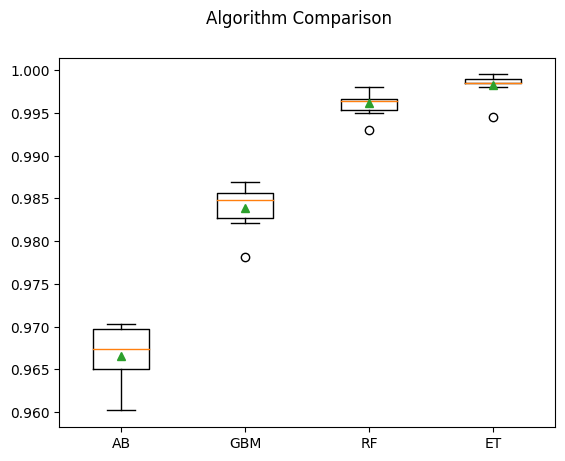

In [8]:
# visualize and compare Algorithms
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_ens,labels=names_ens, showmeans=True)
ax.set_xticklabels(names_ens)
plt.show()

In [38]:
import multiprocessing

multiprocessing.cpu_count()

20

In [ ]:

# compare algorithms
algorithms=[]
scoring="f1"
algorithms.append(('LDA',LinearDiscriminantAnalysis()))
algorithms.append(('LR',LogisticRegression()))
algorithms.append(('KNN',KNeighborsClassifier()))
algorithms.append(('GBM',GradientBoostingClassifier()))
algorithms.append(('RF',RandomForestClassifier()))
algorithms.append(('ET',ExtraTreesClassifier()))


results_alg=[]
names_alg=[]
for name, algorithm in algorithms:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(algorithm,x_train,y_train,cv=kfold, scoring=scoring, n_jobs=20)
    results_alg.append(cv_results)
    names_alg.append(name)
    #print(name,'=', round(cv_results.mean(),2),'±',round(cv_results.std(),2))

/tmp/ipykernel_12999/207784017.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names_alg)


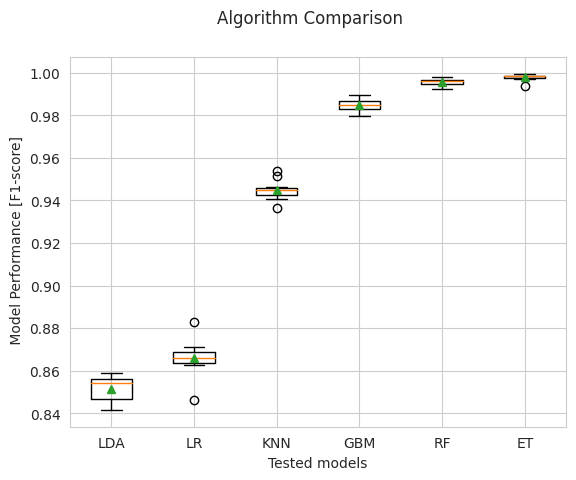

In [113]:
# visualize and compare Algorithms
sns.set_style("whitegrid")
fig_alg=plt.figure()
fig_alg.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_alg,labels=names_alg, showmeans=True)
ax.set_xticklabels(names_alg)

plt.ylabel(" Model Performance [F1-score]")
plt.xlabel("Tested models")
fig_alg.savefig("/home/drdc/Documents/drdc/open_projects/soilweb/4_results/models.png",dpi=300);

In [57]:
np.arange(50,1000, 50)

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])

In [ ]:
#Tune the best model ET
seed=7
param_grid = dict(n_estimators=np.array(np.arange(100,500,100)),
                  criterion=["gini"],min_samples_split=np.arange(2,5,1), max_features=np.arange(1,5,1))
model = ExtraTreesClassifier(random_state=seed, n_jobs=20)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (round(grid_result.best_score_,2), grid_result.best_params_))

In [12]:
print(grid_result.best_score_)
print(grid_result.best_params_["max_features"])

0.9986709350851249
3


In [14]:
#Finalize the ET model
final_ET=ExtraTreesClassifier(random_state=seed, criterion='gini', 
                               max_features=4, min_samples_split=3, n_estimators=300)
final_ET=final_ET.fit(x_train, y_train)

final_ET

ExtraTreesClassifier(max_features=4, min_samples_split=3, n_estimators=300,
                     random_state=7)

In [56]:
#save the model localy
from pickle import dump
from pickle import load

#dump(final_ET, open("/home/drdc/Documents/drdc/open_projects/soilweb/4_code/ET_final_model.sav", "wb"))

In [68]:
#let's load the train model and make prediction on unseen dataset
from pickle import dump
from pickle import load
ET_model=load(open("/home/drdc/Documents/drdc/open_projects/soilweb/3_code/ET_final_model.sav", "rb"))
ET_model

ExtraTreesClassifier(max_features=4, min_samples_split=3, n_estimators=300,
                     random_state=7)

In [27]:
#Make predictions on validation dataset
from sklearn.metrics import matthews_corrcoef
predictions_ET= final_ET.predict(x_val)
print(matthews_corrcoef(y_val, predictions_ET))
print(confusion_matrix(y_val, predictions_ET))
print(classification_report(y_val, predictions_ET))



0.9749440413635997
[[ 121    0]
 [   6 2546]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       121
         1.0       1.00      1.00      1.00      2552

    accuracy                           1.00      2673
   macro avg       0.98      1.00      0.99      2673
weighted avg       1.00      1.00      1.00      2673



In [ ]:
predictions_ET

In [18]:
model_report=classification_report(y_val, predictions_ET)
Validation_results=confusion_matrix(y_val, predictions_ET)

In [28]:
model_result=open("/home/drdc/Documents/drdc/open_projects/soilweb/4_results/classification_report.csv", "w")

model_result.write(model_report)

model_result.close()


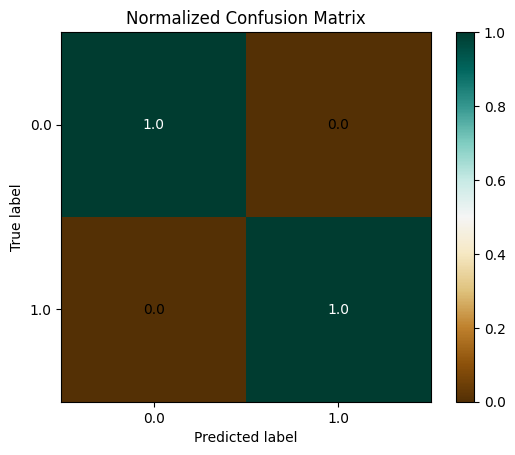

In [29]:

skplt.metrics.plot_confusion_matrix(y_val, predictions_ET, normalize=True, cmap="BrBG");


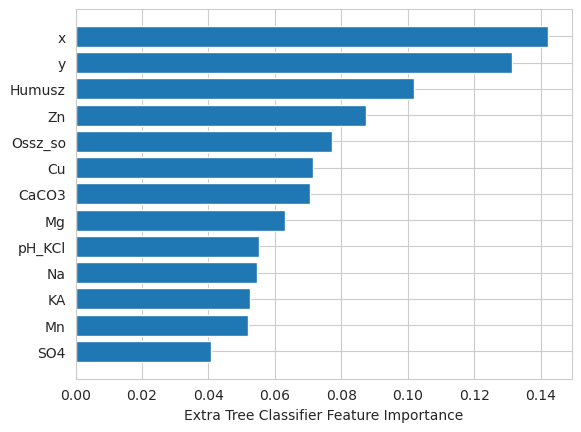

In [79]:
#plot variables importance
# get importance from final ET model
feature=x_train.columns
sorted_idx = final_ET.feature_importances_.argsort()
plt.barh(feature[sorted_idx], final_ET.feature_importances_[sorted_idx])
plt.xlabel("Extra Tree Classifier Feature Importance");

In [123]:
list(df_complete.iloc[:,0:13].columns

Index(['pH_KCl', 'KA', 'Ossz_so', 'CaCO3', 'Humusz', 'Mg', 'Na', 'Zn', 'Cu',
       'Mn', 'SO4', 'x', 'y'],
      dtype='object')

In [30]:
col_names=['pH_KCl', 
           'KA', 
           'Ossz_so', 
           'CaCO3',
            'Humusz', 
           'Mg',
            'Na', 
            'Zn',
             'Cu',
             'Mn', 
             'SO4', 
             'x', 
             'y']

df_new=pd.DataFrame(x_val,columns=col_names)

df_new["label"]=predictions_ET
df_new=df_new.replace({"label":{0:"outlier", 1:"True-value"}})
df_new.head()

,pH_KCl,KA,Ossz_so,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,label
0,6.70,41.0,0.070,0.500,1.7500,199.00,12.40,2.500,3.600,130.00,14.3000,18.587608,45.910055,True-value
1,6.00,51.0,0.103,0.100,2.4500,927.40,410.70,2.042,8.157,273.40,5.0000,20.833404,47.590799,True-value
2,7.24,48.0,0.050,8.390,3.4900,221.00,92.25,1.888,2.050,30.76,5.6250,20.711086,46.300416,True-value
3,7.27,42.0,0.030,5.890,3.3100,237.00,46.70,3.900,5.200,197.00,12.8000,19.735566,47.285525,True-value
4,7.67,25.0,0.020,2.591,1.3449,91.95,20.00,0.597,0.990,37.08,7.8793,19.104918,46.080163,True-value


In [31]:
df_new["label"].value_counts()

label
True-value    2546
outlier        127
Name: count, dtype: int64

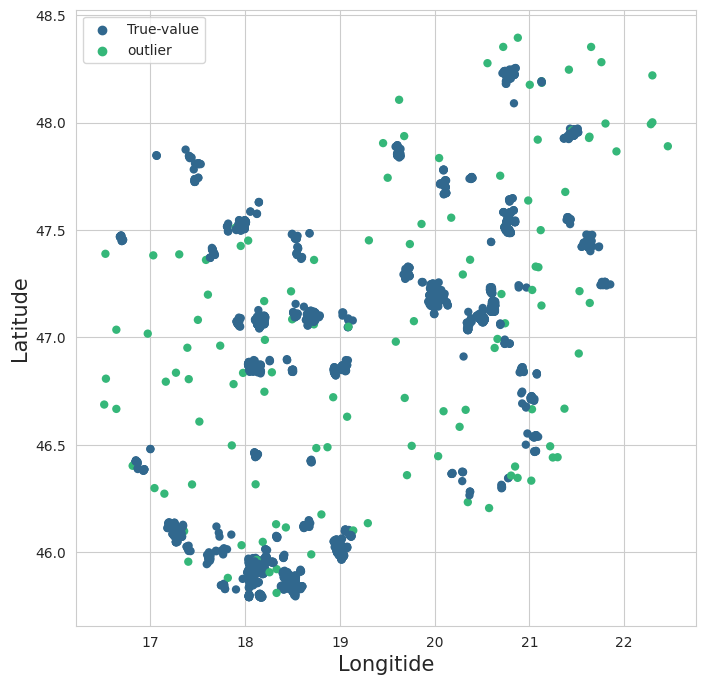

In [53]:
sns.set_style("whitegrid")
fig = plt.subplots(figsize=(8, 8))

sns.scatterplot(y="y", x="x",
                hue="label", 
                palette="viridis",
                sizes=(1, 100), linewidth=0,
                data=df_new)
plt.ylabel("Latitude", size=15)
plt.xlabel("Longitide",size=15)
plt.legend(title="")              



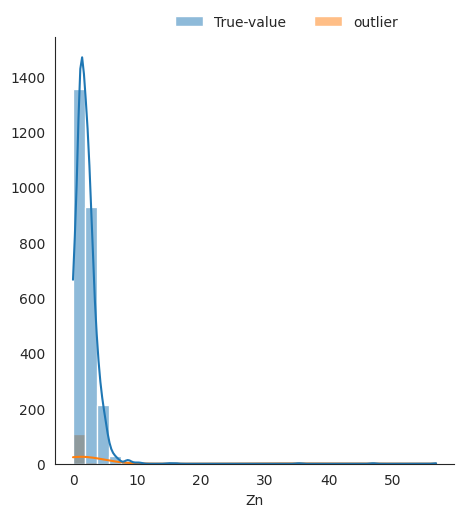

In [48]:
sns.set_style("white")
ax=sns.displot(data=df_new, x="Zn", hue="label",kde=True, bins=30)
plt.ylabel("")


sns.move_legend(
    ax, "center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,)

In [52]:
df_new[(df_new["label"]=="outlier") & (df_new["Zn"]>2)].shape

(17, 14)

In [ ]:
df_new.plot(kind='box', subplots=True, col,layout=(3,3), sharex=False, sharey=False)
plt.show()

In [ ]:
df_new.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/test_scores.csv", index=False)

# Part two: Classifying soil classes


In [6]:
# read in the data

new_class=pd.read_excel("/home/drdc/Documents/drdc/open_projects/soilweb/1_original/T1ST2.xlsx", sheet_name=0)
orig_class=pd.read_excel("/home/drdc/Documents/drdc/open_projects/soilweb/1_original/T1ST2.xlsx", sheet_name=1)
lab_data=pd.read_excel("/home/drdc/Documents/drdc/open_projects/soilweb/1_original/T1ST2.xlsx", sheet_name=2)


In [3]:
#look at the structue of the data
# structure of of new classes
print(new_class.shape)
new_class.head()

(1203, 2)


,ID,NewClass
0,D1009,Barnafoldek
1,D1013,Barnafoldek
2,D1015,Barnafoldek
3,E0104,Barnafoldek
4,E0108,Agyagbemosodasos_talajok


In [4]:
#look at the orginal classes
print(orig_class.shape)
orig_class.head()

(1296, 3)


,Pont,Fotipus,Termohely
0,D0106,NaN,NaN
1,D0113,NaN,NaN
2,D1003,NaN,NaN
3,D1006,NaN,NaN
4,D1008,NaN,NaN


In [5]:
#look at the lab data
print(lab_data.shape)
lab_data.head()

(9935, 18)


,Pont,Szint,Év,Mélység-től,Mélység-ig,pH_KCl (),KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,EOV_X,EOV_Y
0,S4920,G1,1992,0,30,4.82,25.0,NaN,0.0,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,504239,148173
1,S4920,G1,1993,0,30,5.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,504239,148173
2,S4920,G1,1994,0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,504239,148173
3,S4920,G1,1995,0,30,NaN,NaN,NaN,NaN,5.25,89.0,120.0,2.1,2.2,156.699997,210.399994,504239,148173
4,S4920,G1,1996,0,30,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,504239,148173


In [19]:
# check missing values in the new class
print(new_class.isna().sum())

ID          0
NewClass    0
dtype: int64


In [ ]:
# check missing values in the original classes
print(orig_class.isna().sum())

In [7]:
# we will drop the missing values  in the original classes

orig_class_clean=orig_class.dropna()
print(orig_class_clean.isna().sum())
print(orig_class_clean.shape)
orig_class_clean.head()

Pont         0
Fotipus      0
Termohely    0
dtype: int64
(1257, 3)


,Pont,Fotipus,Termohely
5,D1009,Csernozjom_talajok,1_termohely
6,D1013,Erdo_talajok,2_termohely
8,D1015,Erdo_talajok,2_termohely
11,E0104,Vaztalajok,6_termohely
12,E0108,Erdo_talajok,2_termohely


In [24]:
#check missing values in the lab data

lab_data.isna().sum()

Pont              0
Szint             0
Év                0
Mélység-től       0
Mélység-ig        0
pH_KCl ()      2469
KA             8067
Osszso         5918
CaCO3          3749
Humusz         6331
Mg             7433
Na             7435
Zn             7437
Cu             7436
Mn             7437
SO4            8583
EOV_X             0
EOV_Y             0
dtype: int64

In [8]:
#create a copy of the lab data for further preparation
lab_data_clean=lab_data.copy()
#keep data where Zn is not Null
lab_data_clean=lab_data_clean[lab_data_clean["Zn"].notnull()]

print(lab_data_clean.shape)
lab_data_clean.head()

(2498, 18)


,Pont,Szint,Év,Mélység-től,Mélység-ig,pH_KCl (),KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,EOV_X,EOV_Y
0,S4920,G1,1992,0,30,4.82,25.0,NaN,0.0,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,504239,148173
3,S4920,G1,1995,0,30,NaN,NaN,NaN,NaN,5.25,89.0,120.0,2.1,2.2,156.699997,210.399994,504239,148173
5,I4006,G1,1992,0,30,6.90,56.0,0.06,2.2,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,752977,157573
8,I4006,G1,1995,0,30,5.74,NaN,0.06,NaN,3.12,1157.0,237.0,2.6,9.8,410.600006,8.000000,752977,157573
10,I0303,G1,1992,0,30,8.00,27.0,NaN,0.1,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,694165,186192


In [27]:
#look at the number of missing values per column
lab_data_clean.isna().sum()

Pont              0
Szint             0
Év                0
Mélység-től       0
Mélység-ig        0
pH_KCl ()       275
KA             1244
Osszso         1131
CaCO3           626
Humusz           56
Mg                0
Na                0
Zn                0
Cu                1
Mn                2
SO4            1148
EOV_X             0
EOV_Y             0
dtype: int64

In [28]:
lab_data_clean.describe()

,Év,Mélység-ig,pH_KCl (),KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,EOV_X,EOV_Y
count,2498.000000,2498.000000,2223.000000,1254.000000,1367.000000,1872.000000,2442.000000,2498.000000,2498.000000,2498.000000,2497.000000,2496.000000,1350.000000,2498.000000,2498.000000
mean,1993.520416,26.508006,6.118097,41.232057,0.061756,5.661004,2.242514,276.618094,89.471978,2.875140,4.560272,166.049359,37.788000,641211.703763,204829.665332
std,1.481627,7.712712,1.357507,11.102708,0.072505,8.647111,1.490523,269.503498,330.584986,5.389243,5.796748,164.164393,76.455785,170438.895880,79691.392668
min,1992.000000,0.000000,3.100000,22.000000,0.010000,0.000000,0.080000,3.000000,1.000000,0.100000,0.100000,0.100000,1.100000,0.000000,0.000000
25%,1992.000000,25.000000,4.925000,33.000000,0.030000,0.000000,1.320000,92.000000,23.000000,1.100000,1.700000,41.099998,12.525000,546951.500000,149870.000000
50%,1993.000000,30.000000,6.610000,41.000000,0.050000,1.800000,1.980000,191.000000,34.000000,1.700000,3.000000,125.000000,20.750000,651381.000000,211055.000000
75%,1995.000000,30.000000,7.240000,47.000000,0.080000,8.000000,2.880000,369.000000,57.000000,2.900000,5.200000,228.950001,34.175000,761258.000000,266237.250000
max,1995.000000,150.000000,9.770000,88.000000,1.200000,78.000000,25.900000,2229.000000,6619.000000,99.900002,85.699997,999.900024,999.000000,934020.000000,357010.000000


In [9]:
lab_data_clean_gpd=gpd.GeoDataFrame(lab_data_clean, crs="EPSG:23700", 
                                    geometry=gpd.points_from_xy(lab_data_clean["EOV_X"], 
                                    lab_data_clean["EOV_Y"]))
lab_data_clean_gpd=lab_data_clean_gpd.drop(columns=["EOV_X","EOV_Y"])
lab_data_clean_gpd.head()

,Pont,Szint,Év,Mélység-től,Mélység-ig,pH_KCl (),KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,geometry
0,S4920,G1,1992,0,30,4.82,25.0,NaN,0.0,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,POINT (504239.000 148173.000)
3,S4920,G1,1995,0,30,NaN,NaN,NaN,NaN,5.25,89.0,120.0,2.1,2.2,156.699997,210.399994,POINT (504239.000 148173.000)
5,I4006,G1,1992,0,30,6.90,56.0,0.06,2.2,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,POINT (752977.000 157573.000)
8,I4006,G1,1995,0,30,5.74,NaN,0.06,NaN,3.12,1157.0,237.0,2.6,9.8,410.600006,8.000000,POINT (752977.000 157573.000)
10,I0303,G1,1992,0,30,8.00,27.0,NaN,0.1,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,POINT (694165.000 186192.000)


In [48]:
lab_data_clean_gpd.crs

<Projected CRS: EPSG:23700>
Name: HD72 / EOV
Axis Info [cartesian]:
- Y[east]: Easting (metre)
- X[north]: Northing (metre)
Area of Use:
- name: Hungary.
- bounds: (16.11, 45.74, 22.9, 48.58)
Coordinate Operation:
- name: Egyseges Orszagos Vetuleti
- method: Hotine Oblique Mercator (variant B)
Datum: Hungarian Datum 1972
- Ellipsoid: GRS 1967
- Prime Meridian: Greenwich

In [10]:
labdata_gpd_repr=lab_data_clean_gpd.to_crs({"init":"EPSG:4326"})
labdata_gpd_repr["x"]=labdata_gpd_repr.geometry.x
labdata_gpd_repr["y"]=labdata_gpd_repr.geometry.y
labdata_gpd_repr=labdata_gpd_repr.drop(columns="geometry")
labdata_gpd_repr.head()

/home/drdc/anaconda3/envs/soilweb_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Pont,Szint,Év,Mélység-től,Mélység-ig,pH_KCl (),KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,S4920,G1,1992,0,30,4.82,25.0,NaN,0.0,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,17.142700,46.661903
3,S4920,G1,1995,0,30,NaN,NaN,NaN,NaN,5.25,89.0,120.0,2.1,2.2,156.699997,210.399994,17.142700,46.661903
5,I4006,G1,1992,0,30,6.90,56.0,0.06,2.2,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,20.395386,46.754486
8,I4006,G1,1995,0,30,5.74,NaN,0.06,NaN,3.12,1157.0,237.0,2.6,9.8,410.600006,8.000000,20.395386,46.754486
10,I0303,G1,1992,0,30,8.00,27.0,NaN,0.1,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,19.628387,47.018442


In [11]:
#rename the pH_KCl () to pH_KCl

labdata_gpd_repr.rename(columns={'pH_KCl ()':'pH_KCl'}, inplace=True)
labdata_gpd_repr.head()

,Pont,Szint,Év,Mélység-től,Mélység-ig,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,S4920,G1,1992,0,30,4.82,25.0,NaN,0.0,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,17.142700,46.661903
3,S4920,G1,1995,0,30,NaN,NaN,NaN,NaN,5.25,89.0,120.0,2.1,2.2,156.699997,210.399994,17.142700,46.661903
5,I4006,G1,1992,0,30,6.90,56.0,0.06,2.2,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,20.395386,46.754486
8,I4006,G1,1995,0,30,5.74,NaN,0.06,NaN,3.12,1157.0,237.0,2.6,9.8,410.600006,8.000000,20.395386,46.754486
10,I0303,G1,1992,0,30,8.00,27.0,NaN,0.1,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,19.628387,47.018442


In [12]:
# remove unnecessary columns
labdata_gpd_repr=labdata_gpd_repr.drop(columns=["Szint","Év","Mélység-től","Mélység-ig"], axis=1)
labdata_gpd_repr.head()

,Pont,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,S4920,4.82,25.0,NaN,0.0,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,17.142700,46.661903
3,S4920,NaN,NaN,NaN,NaN,5.25,89.0,120.0,2.1,2.2,156.699997,210.399994,17.142700,46.661903
5,I4006,6.90,56.0,0.06,2.2,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,20.395386,46.754486
8,I4006,5.74,NaN,0.06,NaN,3.12,1157.0,237.0,2.6,9.8,410.600006,8.000000,20.395386,46.754486
10,I0303,8.00,27.0,NaN,0.1,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,19.628387,47.018442


In [13]:
#keep data where KA is not Null
labdata_gpd_repr=labdata_gpd_repr[labdata_gpd_repr["KA"].notnull()]
print(labdata_gpd_repr.shape)

labdata_gpd_repr.head()

(1254, 14)


,Pont,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,S4920,4.82,25.0,NaN,0.0,6.08,140.0,146.0,6.3,7.0,40.299999,17.1,17.142700,46.661903
5,I4006,6.90,56.0,0.06,2.2,1.93,1285.0,562.0,0.3,4.1,115.599998,29.9,20.395386,46.754486
10,I0303,8.00,27.0,NaN,0.1,0.29,39.0,75.0,0.8,1.0,47.599998,19.1,19.628387,47.018442
15,I1006,7.16,62.0,0.03,2.0,3.89,737.0,74.0,0.8,5.6,127.400002,6.2,20.428081,46.575335
20,I1406,6.64,62.0,0.09,0.5,1.63,702.0,179.0,1.6,12.0,222.500000,59.0,20.184260,46.541468


In [154]:

#loook at the number of missing values
labdata_gpd_repr.isna().sum()

Pont        0
pH_KCl      0
KA          0
Osszso    513
CaCO3     311
Humusz      0
Mg          0
Na          0
Zn          0
Cu          1
Mn          2
SO4       479
x           0
y           0
dtype: int64

In [108]:
# look at the missing values
labdata_gpd_repr.describe()

,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
count,1254.000000,1254.000000,741.000000,943.000000,1254.000000,1254.000000,1254.000000,1254.000000,1253.000000,1252.000000,775.000000,1254.000000,1254.000000
mean,6.133724,41.232057,0.062119,5.726617,2.248078,298.716108,100.669059,3.090351,4.790184,146.825240,28.971871,18.912931,47.157177
std,1.323082,11.102708,0.082550,8.932514,1.477995,269.616980,386.518630,5.659200,5.719717,144.007082,70.189868,2.269956,0.751599
min,3.110000,22.000000,0.010000,0.000000,0.080000,5.000000,3.000000,0.100000,0.100000,0.100000,2.100000,10.787670,45.035856
25%,5.022500,33.000000,0.020000,0.000000,1.320000,111.000000,26.000000,1.200000,1.700000,45.074999,12.000000,17.689531,46.682376
50%,6.575000,41.000000,0.050000,1.700000,2.000000,214.000000,38.000000,1.800000,3.200000,120.350002,18.400000,19.031083,47.225627
75%,7.230000,47.000000,0.080000,8.000000,2.880000,402.000000,61.000000,3.100000,5.700000,179.724998,24.800000,20.510074,47.732055
max,9.760000,88.000000,1.200000,78.000000,22.400000,1779.000000,6619.000000,99.000000,60.299999,999.000000,999.000000,22.856436,48.542337


In [14]:
#create values for missing values for each columns
# For the first try we will use the median value for each column

miss_val={"Osszso":0.02, "SO4":2, "Mn":labdata_gpd_repr["Mn"].mean(),
          "Cu":labdata_gpd_repr["Cu"].mean()}
labdata_gpd_repr=labdata_gpd_repr.fillna(value=miss_val)
labdata_gpd_repr.isna().sum()

Pont        0
pH_KCl      0
KA          0
Osszso      0
CaCO3     311
Humusz      0
Mg          0
Na          0
Zn          0
Cu          0
Mn          0
SO4         0
x           0
y           0
dtype: int64

In [15]:
CaCO3=[]
for _, row in labdata_gpd_repr.iterrows():
  if row["pH_KCl"]<=5.6:
    CaCO3.append(0.0)
  else:
    CaCO3.append(5.726617)
labdata_gpd_repr['CaCO3']=pd.to_numeric(CaCO3, errors='coerce')

In [15]:
labdata_gpd_repr[labdata_gpd_repr["pH_KCl"]>6]

,Pont,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
5,I4006,6.90,56.0,0.06,5.726617,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,20.395386,46.754486
10,I0303,8.00,27.0,0.02,5.726617,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,19.628387,47.018442
15,I1006,7.16,62.0,0.03,5.726617,3.89,737.0,74.0,0.8,5.6,127.400002,6.200000,20.428081,46.575335
20,I1406,6.64,62.0,0.09,5.726617,1.63,702.0,179.0,1.6,12.0,222.500000,59.000000,20.184260,46.541468
25,I1606,7.05,53.0,0.06,5.726617,1.50,1367.0,151.0,0.6,6.4,134.000000,6.900000,20.233267,46.743029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,R1320,7.24,31.0,0.02,5.726617,0.52,348.0,55.0,0.6,1.0,71.000000,18.799999,10.787670,45.035856
8981,R2319,7.23,45.0,0.02,5.726617,1.96,896.0,57.0,0.5,0.7,19.500000,44.599998,10.787670,45.035856
9106,R1114,6.44,39.0,0.02,5.726617,1.09,641.0,35.0,0.4,1.5,120.599998,14.500000,17.955009,46.848413
9446,R1314,7.05,36.0,0.02,5.726617,1.80,495.0,36.0,1.2,2.1,168.000000,21.600000,10.787670,45.035856


In [16]:
labdata_gpd_repr.rename(columns={"Pont":"ID"}, inplace=True)
labdata_gpd_repr.head()

,ID,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,S4920,4.82,25.0,0.02,0.000000,6.08,140.0,146.0,6.3,7.0,40.299999,17.1,17.142700,46.661903
5,I4006,6.90,56.0,0.06,5.726617,1.93,1285.0,562.0,0.3,4.1,115.599998,29.9,20.395386,46.754486
10,I0303,8.00,27.0,0.02,5.726617,0.29,39.0,75.0,0.8,1.0,47.599998,19.1,19.628387,47.018442
15,I1006,7.16,62.0,0.03,5.726617,3.89,737.0,74.0,0.8,5.6,127.400002,6.2,20.428081,46.575335
20,I1406,6.64,62.0,0.09,5.726617,1.63,702.0,179.0,1.6,12.0,222.500000,59.0,20.184260,46.541468


In [170]:
new_class

,ID,NewClass
0,D1009,Barnafoldek
1,D1013,Barnafoldek
2,D1015,Barnafoldek
3,E0104,Barnafoldek
4,E0108,Agyagbemosodasos_talajok
...,...,...
1198,S8213,Karbonat_talaj
1199,S8313,Homoktalaj
1200,S8413,Karbonat_talaj
1201,S8513,Agyagbemosodasos_talajok


In [162]:
# combine the data
print(new_class.shape)
print(labdata_gpd_repr.shape)

(1203, 2)
(1254, 14)


In [17]:
labdata_gpd_merge=pd.merge(new_class, labdata_gpd_repr, how="left", on="ID")
print(labdata_gpd_merge.shape)
labdata_gpd_merge.head()

(1203, 15)


,ID,NewClass,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,D1009,Barnafoldek,6.74,45.0,0.12,5.726617,3.13,298.0,179.0,1.8,3.6,550.000000,2.0,21.235648,47.363358
1,D1013,Barnafoldek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1015,Barnafoldek,5.38,25.0,0.02,0.000000,0.08,154.0,11.0,0.5,0.6,90.000000,2.0,21.846264,47.964880
3,E0104,Barnafoldek,7.20,54.0,0.06,5.726617,0.88,362.0,52.0,1.4,1.9,125.099998,9.5,21.358036,46.706409
4,E0108,Agyagbemosodasos_talajok,3.52,34.0,0.02,0.000000,1.51,76.0,28.0,2.3,2.1,448.500000,13.4,16.550275,47.660755


In [174]:
labdata_gpd_merge.isna().sum()

ID           0
NewClass     0
pH_KCl      18
KA          18
Osszso      18
CaCO3       18
Humusz      18
Mg          18
Na          18
Zn          18
Cu          18
Mn          18
SO4         18
x           18
y           18
dtype: int64

In [177]:
labdata_gpd_merge["NewClass"].value_counts()


NewClass
Barnafoldek                 329
Agyagbemosodasos_talajok    271
Duzzado_agyagtalaj          187
Mezosegi_talaj              128
Homoktalaj                  119
Karbonat_talaj               63
Reti_talaj                   39
Szolonyec_talajok            22
Szoloncsak_talaj             12
Kozethatasu_talaj            10
Koves-Sziklas_vaztalaj        5
Name: count, dtype: int64

In [18]:
labdata_gpd_merge=labdata_gpd_merge.dropna(axis=0)
print(labdata_gpd_merge.shape)
labdata_gpd_merge.isna().sum()

(1185, 15)


ID          0
NewClass    0
pH_KCl      0
KA          0
Osszso      0
CaCO3       0
Humusz      0
Mg          0
Na          0
Zn          0
Cu          0
Mn          0
SO4         0
x           0
y           0
dtype: int64

In [178]:
labdata_gpd_merge.head()

,ID,NewClass,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,D1009,Barnafoldek,6.74,45.0,0.12,5.726617,3.13,298.0,179.0,1.8,3.6,550.000000,2.0,21.235648,47.363358
2,D1015,Barnafoldek,5.38,25.0,0.02,0.000000,0.08,154.0,11.0,0.5,0.6,90.000000,2.0,21.846264,47.964880
3,E0104,Barnafoldek,7.20,54.0,0.06,5.726617,0.88,362.0,52.0,1.4,1.9,125.099998,9.5,21.358036,46.706409
4,E0108,Agyagbemosodasos_talajok,3.52,34.0,0.02,0.000000,1.51,76.0,28.0,2.3,2.1,448.500000,13.4,16.550275,47.660755
5,E0111,Agyagbemosodasos_talajok,3.63,35.0,0.02,0.000000,1.69,108.0,25.0,1.9,1.2,51.200001,15.5,18.412337,47.630966


In [113]:
labdata_gpd_merge.head()

,ID,NewClass,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,D1009,Barnafoldek,6.74,45.0,0.12,5.726617,3.13,298.0,179.0,1.8,3.6,550.000000,2.0,21.235648,47.363358
2,D1015,Barnafoldek,5.38,25.0,0.02,0.000000,0.08,154.0,11.0,0.5,0.6,90.000000,2.0,21.846264,47.964880
3,E0104,Barnafoldek,7.20,54.0,0.06,5.726617,0.88,362.0,52.0,1.4,1.9,125.099998,9.5,21.358036,46.706409
4,E0108,Agyagbemosodasos_talajok,3.52,34.0,0.02,0.000000,1.51,76.0,28.0,2.3,2.1,448.500000,13.4,16.550275,47.660755
5,E0111,Agyagbemosodasos_talajok,3.63,35.0,0.02,0.000000,1.69,108.0,25.0,1.9,1.2,51.200001,15.5,18.412337,47.630966


In [19]:

x=labdata_gpd_merge.iloc[:,2:15]# the values may change in the future as the data features increase
y=labdata_gpd_merge.iloc[:,1]# 

# Create test and evaluation metrics
num_folds=10
seed=7
scoring='accuracy'
val_size=0.20
seed=7
x_train, x_val, y_train,y_val=train_test_split(x,y,test_size=val_size, random_state=seed)


In [16]:
# compare algorithms
algorithms_tim=[]
scoring="accuracy"
algorithms_tim.append(('GBM',GradientBoostingClassifier()))
algorithms_tim.append(('RF',RandomForestClassifier()))
algorithms_tim.append(('ET',ExtraTreesClassifier()))


results_tim=[]
names_tim=[]
for name, algorithm in algorithms_tim:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results_tim=cross_val_score(algorithm,x_train,y_train,cv=kfold, scoring=scoring, n_jobs=20)
    results_tim.append(cv_results_tim)
    names_tim.append(name)
    print(name,'=', round(cv_results_tim.mean(),2),'±',round(cv_results_tim.std(),2))

GBM = 0.53 ± 0.06
RF = 0.54 ± 0.04
ET = 0.54 ± 0.05


In [20]:
#work and predict with orginal class
orig_class_clean.rename(columns={"Pont":"ID"}, inplace=True)
orig_class_clean

/tmp/ipykernel_5813/330142894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_class_clean.rename(columns={"Pont":"ID"}, inplace=True)


,ID,Fotipus,Termohely
5,D1009,Csernozjom_talajok,1_termohely
6,D1013,Erdo_talajok,2_termohely
8,D1015,Erdo_talajok,2_termohely
11,E0104,Vaztalajok,6_termohely
12,E0108,Erdo_talajok,2_termohely
...,...,...,...
1291,S8213,Ontes_lejtohordalek,3_termohely
1292,S8313,Ontes_lejtohordalek,3_termohely
1293,S8413,Vaztalajok,6_termohely
1294,S8513,Vaztalajok,6_termohely


In [196]:
labdata_gpd_repr

,ID,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,S4920,4.82,25.0,0.02,0.000000,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,17.142700,46.661903
5,I4006,6.90,56.0,0.06,5.726617,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,20.395386,46.754486
10,I0303,8.00,27.0,0.02,5.726617,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,19.628387,47.018442
15,I1006,7.16,62.0,0.03,5.726617,3.89,737.0,74.0,0.8,5.6,127.400002,6.200000,20.428081,46.575335
20,I1406,6.64,62.0,0.09,5.726617,1.63,702.0,179.0,1.6,12.0,222.500000,59.000000,20.184260,46.541468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,R2319,7.23,45.0,0.02,5.726617,1.96,896.0,57.0,0.5,0.7,19.500000,44.599998,10.787670,45.035856
9106,R1114,6.44,39.0,0.02,5.726617,1.09,641.0,35.0,0.4,1.5,120.599998,14.500000,17.955009,46.848413
9110,S4710,5.54,51.0,0.09,0.000000,3.08,448.0,35.0,3.5,16.4,145.000000,2.000000,19.963662,47.772204
9446,R1314,7.05,36.0,0.02,5.726617,1.80,495.0,36.0,1.2,2.1,168.000000,21.600000,10.787670,45.035856


In [195]:
print(orig_class_clean.shape)
print(labdata_gpd_repr.shape)

(1257, 3)
(1254, 14)


In [21]:
labdata_gpd__orig_merge=pd.merge(labdata_gpd_repr,orig_class_clean, how="left", on="ID")
labdata_gpd__orig_merge

,ID,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,Fotipus,Termohely
0,S4920,4.82,25.0,0.02,0.000000,6.08,140.0,146.0,6.3,7.0,40.299999,17.100000,17.142700,46.661903,Laptalajok,6_termohely
1,I4006,6.90,56.0,0.06,5.726617,1.93,1285.0,562.0,0.3,4.1,115.599998,29.900000,20.395386,46.754486,Szikes_talajok,5_termohely
2,I0303,8.00,27.0,0.02,5.726617,0.29,39.0,75.0,0.8,1.0,47.599998,19.100000,19.628387,47.018442,Vaztalajok,4_termohely
3,I1006,7.16,62.0,0.03,5.726617,3.89,737.0,74.0,0.8,5.6,127.400002,6.200000,20.428081,46.575335,Csernozjom_talajok,1_termohely
4,I1406,6.64,62.0,0.09,5.726617,1.63,702.0,179.0,1.6,12.0,222.500000,59.000000,20.184260,46.541468,Reti_talajok,3_termohely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,R2319,7.23,45.0,0.02,5.726617,1.96,896.0,57.0,0.5,0.7,19.500000,44.599998,10.787670,45.035856,Erdo_talajok,2_termohely
1250,R1114,6.44,39.0,0.02,5.726617,1.09,641.0,35.0,0.4,1.5,120.599998,14.500000,17.955009,46.848413,Erdo_talajok,2_termohely
1251,S4710,5.54,51.0,0.09,0.000000,3.08,448.0,35.0,3.5,16.4,145.000000,2.000000,19.963662,47.772204,Erdo_talajok,1_termohely
1252,R1314,7.05,36.0,0.02,5.726617,1.80,495.0,36.0,1.2,2.1,168.000000,21.600000,10.787670,45.035856,Ontes_lejtohordalek,2_termohely


In [115]:
new_class.shape

(1203, 2)

In [198]:
labdata_gpd__orig_merge.shape

(1254, 16)

In [205]:
labdata_gpd__orig_merge.isna().sum()

ID           0
pH_KCl       0
KA           0
Osszso       0
CaCO3        0
Humusz       0
Mg           0
Na           0
Zn           0
Cu           0
Mn           0
SO4          0
x            0
y            0
Fotipus      5
Termohely    5
dtype: int64

In [22]:
labdata_gpd__orig_merge=labdata_gpd__orig_merge.dropna()
labdata_gpd__orig_merge.isna().sum()

ID           0
pH_KCl       0
KA           0
Osszso       0
CaCO3        0
Humusz       0
Mg           0
Na           0
Zn           0
Cu           0
Mn           0
SO4          0
x            0
y            0
Fotipus      0
Termohely    0
dtype: int64

In [116]:
labdata_gpd__orig_merge.shape

(1249, 16)

In [ ]:
labdata_gpd__orig_merge.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/original_classes.csv")
labdata_gpd_merge.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/new_classes.csv")


In [2]:

#load the data for model training
labdata_gpd__orig_merge=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/original_classes.csv")
labdata_gpd_merge=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/new_classes.csv")


In [3]:

x=labdata_gpd__orig_merge.iloc[:,1:12]# the values may change in the future as the data features increase
y=labdata_gpd__orig_merge.iloc[:,15]# 

# Create test and evaluation metrics
num_folds=10
seed=7
scoring='accuracy'
val_size=0.20
seed=7
x_train, x_val, y_train,y_val=train_test_split(x,y,test_size=val_size, random_state=seed)

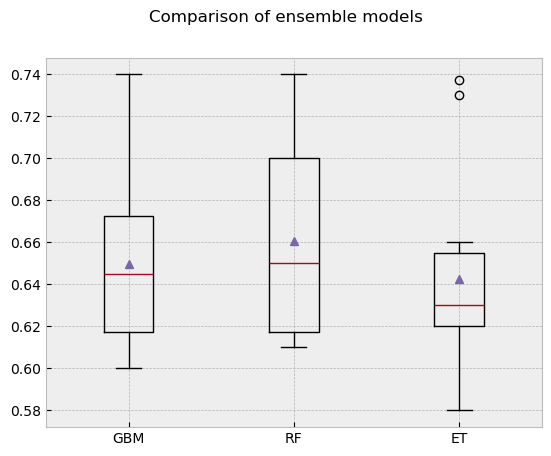

In [4]:
# spot check algorithm


# compare algorithms
algorithms=[]
scoring="accuracy"

algorithms.append(('GBM',GradientBoostingClassifier()))
algorithms.append(('RF',RandomForestClassifier()))
algorithms.append(('ET',ExtraTreesClassifier()))


results_alg=[]
names_alg=[]
for name, algorithm in algorithms:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(algorithm,x_train,y_train,cv=kfold, scoring=scoring, n_jobs=-1)
    results_alg.append(cv_results)
    names_alg.append(name)


# visualize and compare Algorithms
plt.style.use("bmh")
fig=plt.figure()
fig.suptitle('Comparison of ensemble models')
ax = fig.add_subplot(111)
plt.boxplot(results_alg,labels=names_alg, showmeans=True)
ax.set_xticklabels(names_alg)
plt.show()

In [6]:
# combine the three ensemble to develop a voting classifier

Termohely_estimators = [
    ("RF", RandomForestClassifier(random_state=seed)),
    ("ET", ExtraTreesClassifier(random_state=seed)),
    ("GBM", GradientBoostingClassifier(random_state=seed))]

voting_clf_Termohely = VotingClassifier(Termohely_estimators)

voting_clf_Termohely.fit(x_train, y_train)
#print(voting_clf_Termohely.score(x_train, y_train))


VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=7)),
                             ('ET', ExtraTreesClassifier(random_state=7)),
                             ('GBM',
                              GradientBoostingClassifier(random_state=7))])

In [7]:
#Make predictions on validation dataset

predictions_Termohely= voting_clf_Termohely.predict(x_val)
print(voting_clf_Termohely.score(x_val, y_val))
print(confusion_matrix(y_val, predictions_Termohely))
print(classification_report(y_val, predictions_Termohely))

0.692
[[34 10  5  0  0  0]
 [ 5 63  2  4  0  0]
 [ 9  9 48  0  1  1]
 [ 3  6  0 19  0  0]
 [ 0  2  2  0  7  0]
 [ 4 10  4  0  0  2]]
              precision    recall  f1-score   support

 1_termohely       0.62      0.69      0.65        49
 2_termohely       0.63      0.85      0.72        74
 3_termohely       0.79      0.71      0.74        68
 4_termohely       0.83      0.68      0.75        28
 5_termohely       0.88      0.64      0.74        11
 6_termohely       0.67      0.10      0.17        20

    accuracy                           0.69       250
   macro avg       0.73      0.61      0.63       250
weighted avg       0.71      0.69      0.67       250



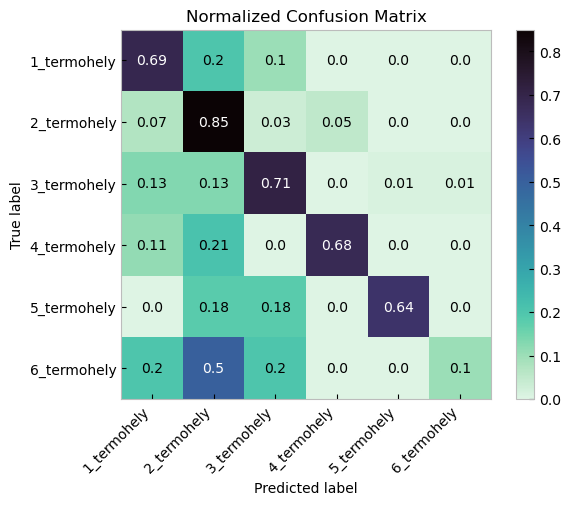

In [8]:
skplt.metrics.plot_confusion_matrix(y_val, predictions_Termohely, normalize=True, cmap="mako_r")
plt.xticks(rotation=45, ha="right");

In [9]:
def calculate_feature_importance(voting_clf, weights):
    """ Function to calculate feature importance of Voting Classifier """
    
    feature_importance = dict()
    for estimator in voting_clf.estimators_:
        feature_importance[str(estimator)] = estimator.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for id, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[id]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores



Termohely_df = pd.DataFrame()
Termohely_df['Feature'] = x_train.columns
Termohely_df['Feature Importance'] = calculate_feature_importance(voting_clf_Termohely, [1, 1, 2])



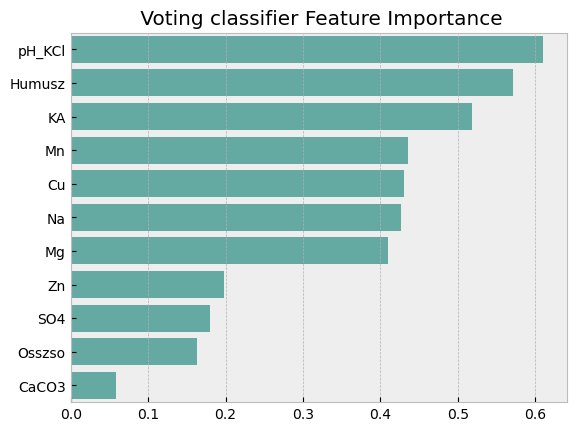

In [12]:
#plot variable importance
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.barplot(data=Termohely_df.sort_values(by="Feature Importance", ascending=False), y="Feature",
 x="Feature Importance",color="#5ab4ac")

plt.title(" Voting classifier Feature Importance")
plt.ylabel("")
plt.xlabel("");

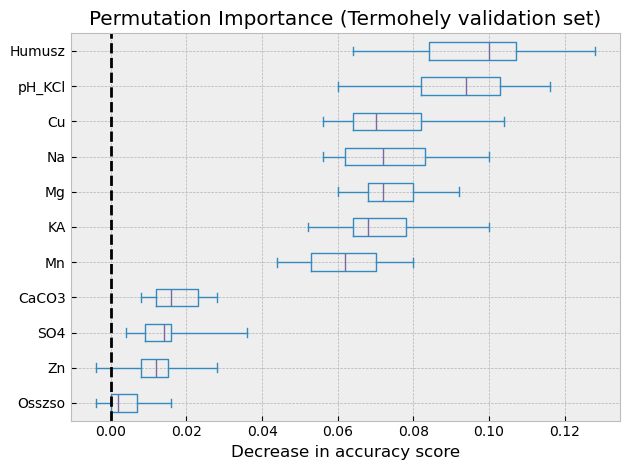

In [13]:
#plot the distribution of permitation importance
permit_Termohely= permutation_importance(
    voting_clf_Termohely, x_val, y_val, n_repeats=10, random_state=7, n_jobs=20
)

sorted_importances_idx = permit_Termohely.importances_mean.argsort()
importances_Termohely = pd.DataFrame(
    permit_Termohely.importances[sorted_importances_idx].T,
    columns=x.columns[sorted_importances_idx],
)
ax = importances_Termohely.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importance (Termohely validation set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout();



In [131]:
labdata_gpd__orig_merge.iloc[:,1:12]

,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4
0,4.82,25,0.02,0.000000,6.08,140,146,6.3,7.0,40.299999,17.100000
1,6.90,56,0.06,5.726617,1.93,1285,562,0.3,4.1,115.599998,29.900000
2,8.00,27,0.02,5.726617,0.29,39,75,0.8,1.0,47.599998,19.100000
3,7.16,62,0.03,5.726617,3.89,737,74,0.8,5.6,127.400002,6.200000
4,6.64,62,0.09,5.726617,1.63,702,179,1.6,12.0,222.500000,59.000000
...,...,...,...,...,...,...,...,...,...,...,...
1244,7.23,45,0.02,5.726617,1.96,896,57,0.5,0.7,19.500000,44.599998
1245,6.44,39,0.02,5.726617,1.09,641,35,0.4,1.5,120.599998,14.500000
1246,5.54,51,0.09,0.000000,3.08,448,35,3.5,16.4,145.000000,2.000000
1247,7.05,36,0.02,5.726617,1.80,495,36,1.2,2.1,168.000000,21.600000


In [130]:
labdata_gpd__orig_merge.iloc[:,14]

0                Laptalajok
1            Szikes_talajok
2                Vaztalajok
3        Csernozjom_talajok
4              Reti_talajok
               ...         
1244           Erdo_talajok
1245           Erdo_talajok
1246           Erdo_talajok
1247    Ontes_lejtohordalek
1248    Kozethatasu_talajok
Name: Fotipus, Length: 1249, dtype: object

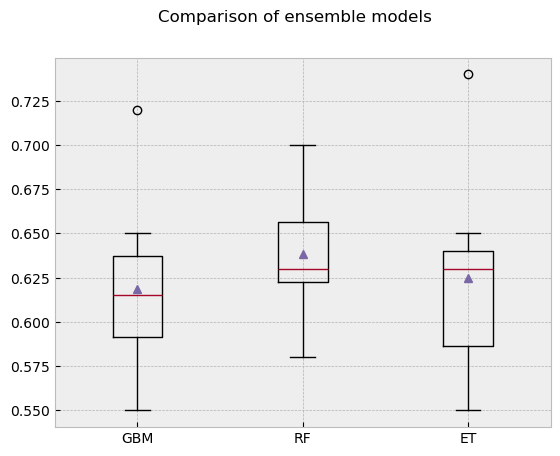

In [14]:
# spot check algorithm


x_Fotipus=labdata_gpd__orig_merge.iloc[:,1:12]# the values may change in the future as the data features increase
y_Fotipus=labdata_gpd__orig_merge.iloc[:,14]# 

# Create test and evaluation metrics
num_folds=10
seed=7
scoring='accuracy'
val_size=0.20
seed=7
x_train_Fotipus, x_val_Fotipus, y_train_Fotipus,y_val_Fotipus=train_test_split(x_Fotipus,y_Fotipus,test_size=val_size, random_state=seed)
# compare algorithms
algorithms_Fotipus=[]
scoring="accuracy"

algorithms_Fotipus.append(('GBM',GradientBoostingClassifier()))
algorithms_Fotipus.append(('RF',RandomForestClassifier()))
algorithms_Fotipus.append(('ET',ExtraTreesClassifier()))


results_Fotipus=[]
names_Fotipus=[]
for name, algorithm in algorithms_Fotipus:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results_Fotipus=cross_val_score(algorithm,x_train_Fotipus,y_train_Fotipus,cv=kfold, scoring=scoring, n_jobs=-1)
    results_Fotipus.append(cv_results_Fotipus)
    names_Fotipus.append(name)



# visualize and compare Algorithms
plt.style.use("bmh")
fig=plt.figure()
fig.suptitle('Comparison of ensemble models')
ax = fig.add_subplot(111)
plt.boxplot(results_Fotipus,labels=names_Fotipus, showmeans=True)
ax.set_xticklabels(names_Fotipus)
plt.show()

In [15]:
# combine the three ensesable to develop a voting classifier for Fotipus

Fotipus_estimators = [
    ("RF", RandomForestClassifier(random_state=seed)),
    ("ET", ExtraTreesClassifier(random_state=seed)),
    ("GBM", GradientBoostingClassifier(random_state=seed))]

voting_clf_Fotipus = VotingClassifier(Fotipus_estimators,voting="hard")

voting_clf_Fotipus.fit(x_train_Fotipus, y_train_Fotipus)

VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=7)),
                             ('ET', ExtraTreesClassifier(random_state=7)),
                             ('GBM',
                              GradientBoostingClassifier(random_state=7))])

In [16]:
#Make predictions on validation dataset

predictions_Fotipus= voting_clf_Fotipus.predict(x_val_Fotipus)
print(voting_clf_Fotipus.score(x_val_Fotipus, y_val_Fotipus))
print(confusion_matrix(y_val_Fotipus, predictions_Fotipus))
print(classification_report(y_val_Fotipus, predictions_Fotipus))

0.644
[[28  6  0  0  1  2  0  0]
 [ 3 69  0  0  4  2  0  4]
 [ 1  3  0  0  1  2  0  0]
 [ 0  0  1  1  0  2  0  0]
 [ 4  9  0  0 15 10  0  1]
 [ 1  8  0  0  1 25  0  0]
 [ 0  1  0  0  0  3  4  0]
 [ 4 14  0  0  0  1  0 19]]
                     precision    recall  f1-score   support

 Csernozjom_talajok       0.68      0.76      0.72        37
       Erdo_talajok       0.63      0.84      0.72        82
Kozethatasu_talajok       0.00      0.00      0.00         7
         Laptalajok       1.00      0.25      0.40         4
Ontes_lejtohordalek       0.68      0.38      0.49        39
       Reti_talajok       0.53      0.71      0.61        35
     Szikes_talajok       1.00      0.50      0.67         8
         Vaztalajok       0.79      0.50      0.61        38

           accuracy                           0.64       250
          macro avg       0.66      0.49      0.53       250
       weighted avg       0.66      0.64      0.62       250



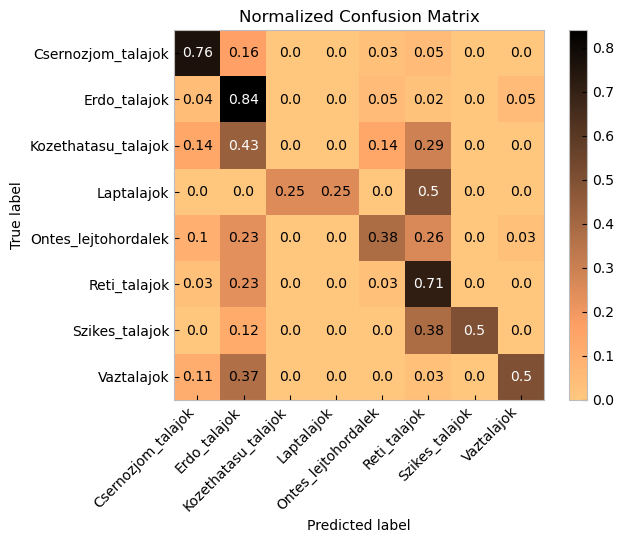

In [17]:
skplt.metrics.plot_confusion_matrix(y_val_Fotipus, predictions_Fotipus, normalize=True, cmap="copper_r")
plt.xticks(rotation=45, ha="right");

/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


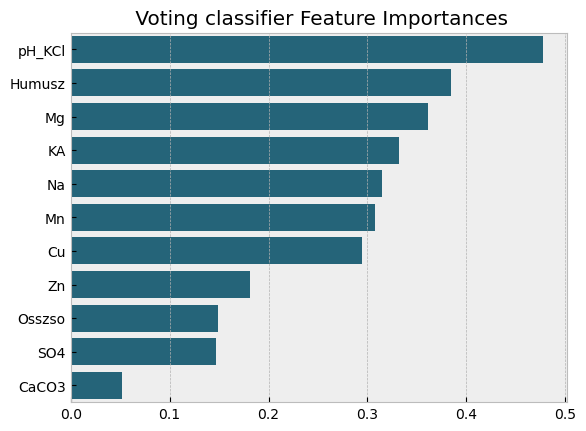

In [136]:

Fotipus_df = pd.DataFrame()
Fotipus_df['Feature'] = x_train_Fotipus.columns
Fotipus_df['Feature Importance'] = calculate_feature_importance(voting_clf_Fotipus, [1, 1, 1])


sns.barplot(data=Fotipus_df.sort_values(by="Feature Importance", ascending=False), y="Feature",
 x="Feature Importance",color="#176B87")

plt.title(" Voting classifier Feature Importances")
plt.ylabel("")
plt.xlabel("");

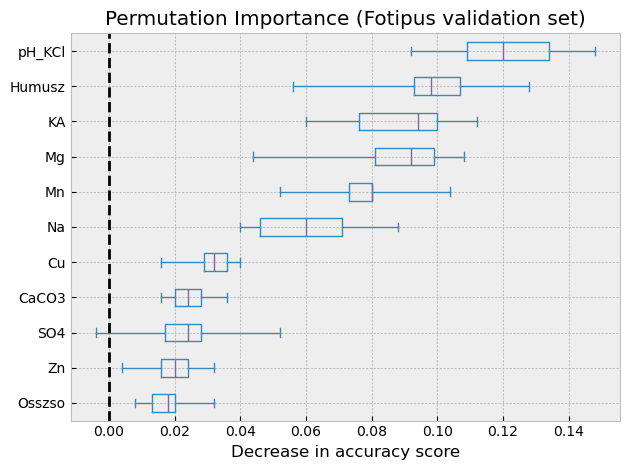

In [24]:
from sklearn.inspection import permutation_importance

result_Fotipus = permutation_importance(
    voting_clf_Fotipus, x_val_Fotipus, y_val_Fotipus, n_repeats=10, random_state=7, n_jobs=20
)

sorted_importances_idx = result_Fotipus.importances_mean.argsort()
importances_Fotipus = pd.DataFrame(
    result_Fotipus.importances[sorted_importances_idx].T,
    columns=x_Fotipus.columns[sorted_importances_idx],
)
ax = importances_Fotipus.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importance (Fotipus validation set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [137]:
#train the model to predict the new classes

labdata_newclass_merge=labdata_gpd_merge
print(labdata_newclass_merge.shape)
labdata_newclass_merge.head()

(1185, 15)


,ID,NewClass,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,D1009,Barnafoldek,6.74,45,0.12,5.726617,3.13,298,179,1.8,3.6,550.000000,2.0,21.235648,47.363358
1,D1015,Barnafoldek,5.38,25,0.02,0.000000,0.08,154,11,0.5,0.6,90.000000,2.0,21.846264,47.964880
2,E0104,Barnafoldek,7.20,54,0.06,5.726617,0.88,362,52,1.4,1.9,125.099998,9.5,21.358036,46.706409
3,E0108,Agyagbemosodasos_talajok,3.52,34,0.02,0.000000,1.51,76,28,2.3,2.1,448.500000,13.4,16.550275,47.660755
4,E0111,Agyagbemosodasos_talajok,3.63,35,0.02,0.000000,1.69,108,25,1.9,1.2,51.200001,15.5,18.412337,47.630966


In [138]:
labdata_newclass_merge.iloc[:,2:13]

,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4
0,6.74,45,0.12,5.726617,3.13,298,179,1.800000,3.600000,550.000000,2.000000
1,5.38,25,0.02,0.000000,0.08,154,11,0.500000,0.600000,90.000000,2.000000
2,7.20,54,0.06,5.726617,0.88,362,52,1.400000,1.900000,125.099998,9.500000
3,3.52,34,0.02,0.000000,1.51,76,28,2.300000,2.100000,448.500000,13.400000
4,3.63,35,0.02,0.000000,1.69,108,25,1.900000,1.200000,51.200001,15.500000
...,...,...,...,...,...,...,...,...,...,...,...
1180,7.71,48,0.08,5.726617,2.22,365,111,77.300003,33.799999,8.700000,38.200001
1181,7.29,35,0.05,5.726617,3.77,170,54,5.700000,5.500000,28.100000,47.200001
1182,7.27,29,0.02,5.726617,1.84,83,54,6.200000,2.800000,59.099998,8.200000
1183,7.14,36,0.06,5.726617,2.87,168,49,13.000000,5.200000,24.400000,31.500000


In [162]:
# combine the three ensesable to develop a voting classifier for 


x_newclass=labdata_newclass_merge.iloc[:,2:13]# the values may change in the future as the data features increase
y_newclass=labdata_newclass_merge.iloc[:,1]# 

# Create test and evaluation metrics
num_folds=10
seed=7
scoring='accuracy'
val_size=0.20
seed=7
x_train_newclass, x_val_newclass, y_train_newclass,y_val_newclass=train_test_split(x_newclass,y_newclass,test_size=val_size, random_state=seed)

newclass_estimators = [
    ("RF", RandomForestClassifier(random_state=seed)),
    ("ET", ExtraTreesClassifier(random_state=seed)),
    ("GBM", GradientBoostingClassifier(random_state=seed))]

voting_clf_newclass = VotingClassifier(newclass_estimators)

voting_clf_newclass.fit(x_train_newclass, y_train_newclass)

VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=7)),
                             ('ET', ExtraTreesClassifier(random_state=7)),
                             ('GBM',
                              GradientBoostingClassifier(random_state=7))])

In [140]:

#Make predictions on validation dataset

predictions_newclass= voting_clf_newclass.predict(x_val_newclass)
print(voting_clf_newclass.score(x_val_newclass, y_val_newclass))
print(confusion_matrix(y_val_newclass, predictions_newclass))
print(classification_report(y_val_newclass, predictions_newclass))

0.4978902953586498
[[29 17  4  3  0  0  0  3  0  0  0]
 [16 36  3  1  1  0  0  5  0  0  0]
 [ 1  7 23  0  0  0  0  2  0  0  1]
 [ 5  5  0 19  0  0  0  1  0  0  0]
 [ 2  5  2  0  2  0  0  4  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0]
 [ 0 11  2  0  0  0  0  9  0  0  0]
 [ 4  1  1  0  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0]
 [ 0  2  1  0  0  0  0  1  0  0  0]]
                          precision    recall  f1-score   support

Agyagbemosodasos_talajok       0.50      0.52      0.51        56
             Barnafoldek       0.42      0.58      0.49        62
      Duzzado_agyagtalaj       0.61      0.68      0.64        34
              Homoktalaj       0.83      0.63      0.72        30
          Karbonat_talaj       0.40      0.13      0.20        15
  Koves-Sziklas_vaztalaj       0.00      0.00      0.00         2
       Kozethatasu_talaj       0.00      0.00      0.00         2
          Mezosegi_talaj       0.35      0.41      0.38

/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

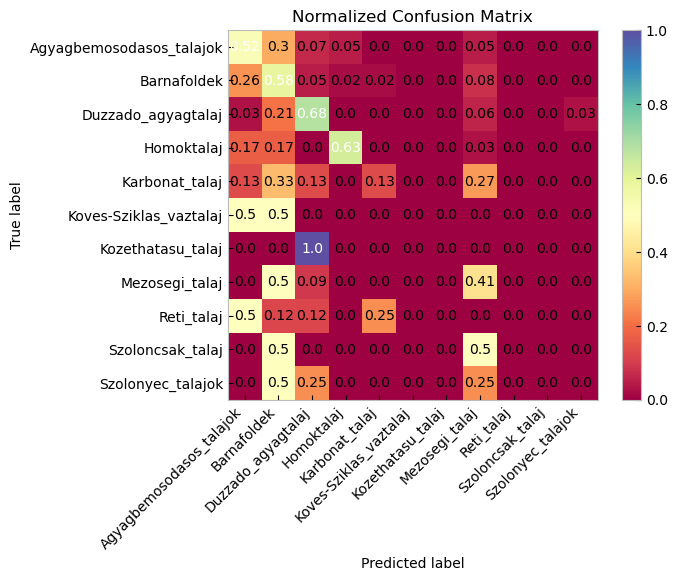

In [120]:
skplt.metrics.plot_confusion_matrix(y_val_newclass, predictions_newclass, normalize=True, cmap="Spectral")
plt.xticks(rotation=45, ha="right");

/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/drdc/mambaforge/envs/soilweb/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


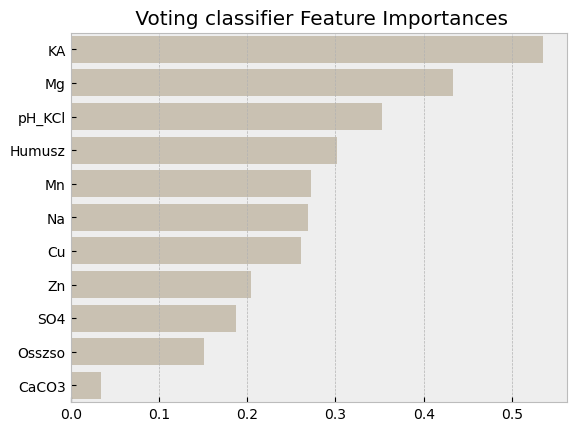

In [121]:

newclass_df = pd.DataFrame()
newclass_df['Feature'] = x_train_newclass.columns
newclass_df['Feature Importance'] = calculate_feature_importance(voting_clf_newclass, [1, 1, 1])


sns.barplot(data=newclass_df.sort_values(by="Feature Importance", ascending=False), y="Feature",
 x="Feature Importance",color="#CDC2AE")

plt.title(" Voting classifier Feature Importances")
plt.ylabel("")
plt.xlabel("");

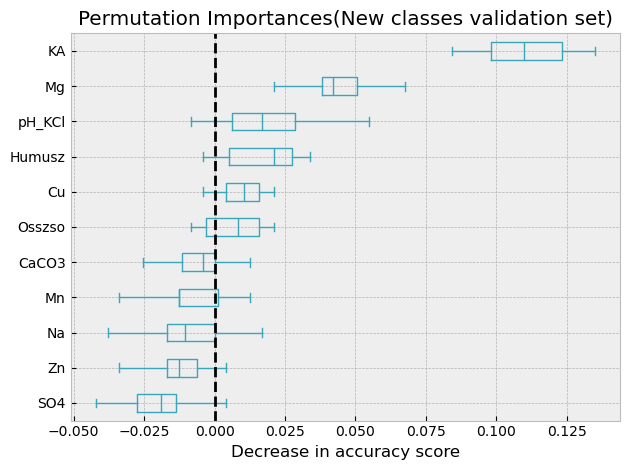

In [122]:
permit_newclass = permutation_importance(
    voting_clf_newclass, x_val_newclass, y_val_newclass, n_repeats=10, random_state=7, n_jobs=20
)

sorted_importances_idx = permit_newclass.importances_mean.argsort()
importances_newclass = pd.DataFrame(
    permit_newclass.importances[sorted_importances_idx].T,
    columns=x_Fotipus.columns[sorted_importances_idx],
)
ax = importances_newclass.plot.box(vert=False, whis=10,color="#3AA6B9")
ax.set_title("Permutation Importances(New classes validation set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout();

In [149]:
df_complete.rename(columns={"Ossz_so":"Osszso"}, inplace=True)

In [150]:
columns=["pH_KCl",
         "KA",
         "Osszso",
         "CaCO3",
         "Humusz",
         "Mg",
         "Na",
         "Zn",
         "Cu",
         "Mn",
         "SO4",
         "x","y"]

df_complete[columns]

,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y
0,7.600,39.0,0.020,8.89,2.2900,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342
1,7.500,42.0,0.020,8.27,2.3100,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787
2,7.310,37.0,0.020,9.63,2.1600,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435
3,7.450,40.0,0.020,9.83,2.8300,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833
4,7.470,40.0,0.020,5.39,2.3000,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,7.220,44.0,0.025,11.26,3.3687,179.5,61.38,0.975,0.934,13.58,7.175,17.113839,47.271144
13358,7.390,46.0,0.070,10.65,3.5011,181.4,44.20,2.551,1.167,14.51,6.800,21.258173,47.533812
13359,6.560,29.0,0.060,0.90,1.9877,709.1,90.74,3.894,2.563,186.00,5.450,17.446683,47.597676
13360,5.747,38.0,0.070,0.10,1.3112,763.9,90.63,1.031,4.187,305.30,5.000,17.801294,47.157446


In [152]:
#final prediction on lab data
columns=["pH_KCl",
         "KA",
         "Osszso",
         "CaCO3",
         "Humusz",
         "Mg",
         "Na",
         "Zn",
         "Cu",
         "Mn",
         "SO4",
         "x","y"]
def final_predictions(df, model1, model2, model3):
    df["Fotipus"]=model1.predict(df[columns])
    df["Termohely"]=model2.predict(df[columns])
    df["Newclass"]=model3.predict(df[columns])
    return df


df_complete_pred=final_predictions(df_complete, voting_clf_Fotipus, voting_clf_Termohely, voting_clf_newclass)

In [153]:
df_complete_pred.head()

,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4,x,y,class,Fotipus,Termohely,Newclass
0,7.60,39.0,0.02,8.89,2.29,94.6,50.69,1.006,1.229,37.90,7.926,18.129391,46.861342,1,Csernozjom_talajok,1_termohely,Karbonat_talaj
1,7.50,42.0,0.02,8.27,2.31,101.6,26.28,1.566,1.431,29.69,8.738,18.131708,46.859787,1,Csernozjom_talajok,1_termohely,Karbonat_talaj
2,7.31,37.0,0.02,9.63,2.16,110.9,40.56,1.470,1.791,34.98,7.159,18.036559,46.881435,1,Csernozjom_talajok,1_termohely,Mezosegi_talaj
3,7.45,40.0,0.02,9.83,2.83,133.7,48.18,1.155,1.638,36.13,5.323,18.056607,46.872833,1,Csernozjom_talajok,1_termohely,Mezosegi_talaj
4,7.47,40.0,0.02,5.39,2.30,124.8,31.45,0.905,1.678,47.05,5.366,18.034298,46.868226,1,Csernozjom_talajok,1_termohely,Mezosegi_talaj


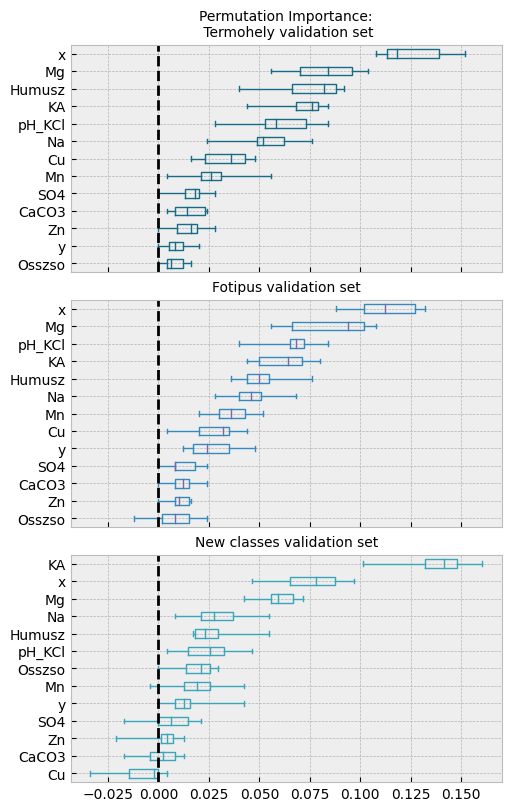

In [211]:
fig, ax = plt.subplots(
    nrows=3, ncols=1, figsize=(5, 8), sharex=True, sharey=False,layout="constrained")


importances_Termohely.plot.box(vert=False, whis=10,color="#176B87",ax=ax[0])
importances_Fotipus.plot.box(vert=False, whis=10, ax=ax[1])
importances_newclass.plot.box(vert=False, whis=10,color="#3AA6B9", ax=ax[2])
ax[0].set_title("Permutation Importance:\n Termohely validation set", size=10)
ax[1].set_title("Fotipus validation set",size=10)
ax[2].set_title("New classes validation set",size=10)
ax[0].set_xlabel("Decrease in accuracy score",size=10)
ax[0].axvline(x=0, color="k", linestyle="--")
ax[1].axvline(x=0, color="k", linestyle="--")
ax[2].axvline(x=0, color="k", linestyle="--");


# Part 3 testing models on validation sets with no X and Y  coordinates as features

In [150]:
# load the data with no X and Y
val_set= pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/validation-set-topsoil.csv")

val_set.head()

,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4
0,7.200000,46.0,0.02,10.9,1.3,38.500000,14.000000,1.400000,2.500000,18.600000,5.000000
1,6.807143,34.0,0.02,3.4,2.8,51.700000,61.911293,3.117533,2.800000,201.185587,10.523626
2,6.807143,36.0,0.03,2.1,2.8,235.500000,61.911293,3.117533,2.900000,201.185587,10.523626
3,6.807143,38.0,0.03,4.8,2.1,365.472941,61.911293,3.117533,6.751556,201.185587,10.523626
4,6.807143,30.0,0.02,0.2,1.1,365.472941,61.911293,3.117533,6.751556,201.185587,10.523626


In [95]:

val_set.tail()

,KA,pH_Kcl,Osszso,Humusz,CaCO3,SO4,Na,Mg,Cu,Zn,Mn
1785,52.0,6.807143,0.02,4.7,48.3,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1786,35.0,6.807143,0.02,2.2,21.7,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1787,48.0,6.807143,0.02,4.6,52.3,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1788,44.0,6.807143,0.03,3.5,1.2,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1789,27.0,6.807143,0.02,0.6,0.6,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587


In [31]:
# check missing values
val_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KA      1749 non-null   float64
 1   pH_Kcl  769 non-null    float64
 2   Osszso  1746 non-null   float64
 3   Humusz  1748 non-null   float64
 4   CaCO3   1746 non-null   float64
 5   SO4     672 non-null    float64
 6   Na      672 non-null    float64
 7   Mg      677 non-null    float64
 8   Cu      672 non-null    float64
 9   Zn      672 non-null    float64
 10  Mn      672 non-null    float64
dtypes: float64(11)
memory usage: 154.0 KB


In [34]:
val_set.isna().sum()

KA          41
pH_Kcl    1021
Osszso      44
Humusz      42
CaCO3       44
SO4       1118
Na        1118
Mg        1113
Cu        1118
Zn        1118
Mn        1118
dtype: int64

In [39]:
val_set["SO4"].mode()

0    5.0
Name: SO4, dtype: float64

In [59]:
val_set["KA"]=val_set["KA"].fillna(val_set["KA"].median())

val_set.isna().sum()

KA           0
pH_Kcl    1020
Osszso      44
Humusz      42
CaCO3       44
SO4       1117
Na        1117
Mg        1110
Cu        1115
Zn        1117
Mn        1117
dtype: int64

In [69]:
def replace_missing_val(df):
    for col in list(df.columns):
        df[col]=df[col].fillna(df[col].median())

    return df



In [73]:
for col in val_set.columns:
    val_set[col]=val_set[col].fillna(val_set[col].mode())

In [74]:
val_set.isna().sum()

KA        0
pH_Kcl    0
Osszso    0
Humusz    0
CaCO3     0
SO4       0
Na        0
Mg        0
Cu        0
Zn        0
Mn        0
dtype: int64

In [100]:
val_set.tail()

,KA,pH_Kcl,Osszso,Humusz,CaCO3,SO4,Na,Mg,Cu,Zn,Mn
1785,52.0,6.807143,0.02,4.7,48.3,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1786,35.0,6.807143,0.02,2.2,21.7,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1787,48.0,6.807143,0.02,4.6,52.3,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1788,44.0,6.807143,0.03,3.5,1.2,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587
1789,27.0,6.807143,0.02,0.6,0.6,10.523626,61.911293,365.472941,6.751556,3.117533,201.185587


In [107]:
val_set=val_set.rename(columns={"pH_Kcl":"pH_KCl"})

In [153]:
val_set.head()

,pH_KCl,KA,Osszso,CaCO3,Humusz,Mg,Na,Zn,Cu,Mn,SO4
0,7.200000,46.0,0.02,10.9,1.3,38.500000,14.000000,1.400000,2.500000,18.600000,5.000000
1,6.807143,34.0,0.02,3.4,2.8,51.700000,61.911293,3.117533,2.800000,201.185587,10.523626
2,6.807143,36.0,0.03,2.1,2.8,235.500000,61.911293,3.117533,2.900000,201.185587,10.523626
3,6.807143,38.0,0.03,4.8,2.1,365.472941,61.911293,3.117533,6.751556,201.185587,10.523626
4,6.807143,30.0,0.02,0.2,1.1,365.472941,61.911293,3.117533,6.751556,201.185587,10.523626


In [109]:
val_set.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/validation-set-topsoil.csv")

In [156]:
val_set=pd.read_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/validation-set-topsoil.csv")



In [157]:
def final_predictions(df, model1, model2, model3):
    """
    the function runs predictions on new data and return a dataframe with all predicted classes
    """
    df["Fotipus_pred"]=model1.predict(df)
    df["Termohely_pred"]=model2.predict(df)
    df["Newclass_pred"]=model3.predict(df)
    return df

In [142]:
voting_clf_Fotipus

VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=7)),
                             ('ET', ExtraTreesClassifier(random_state=7)),
                             ('GBM',
                              GradientBoostingClassifier(random_state=7))])

In [ ]:
validation_set_topsoil_pred=final_predictions(val_set.iloc[:,0:11], voting_clf_Fotipus, voting_clf_Termohely, voting_clf_newclass)

In [173]:
val_set["Termohely_pred"]=voting_clf_Termohely.predict(val_set.iloc[:,0:11])
val_set["Fotipus_pred"]=voting_clf_Fotipus.predict(val_set.iloc[:,0:11])
val_set["Newclass_pred"]=voting_clf_newclass.predict(val_set.iloc[:,0:11])

In [176]:
val_set.to_csv("/home/drdc/Documents/drdc/open_projects/soilweb/2_processed/df_validation_pred_class.csv", index=False)